In [1]:
import numpy as np
import matplotlib.pyplot as plt
import Time_approximations as Ta
import sys  
sys.path.insert(0, '../model1')
from WT_approx import waitingTimeApproximations
from singlelocusmodelextended import SingleLocusModelExt

modelext = SingleLocusModelExt(k=1)
approx = waitingTimeApproximations()

# General simulations (old parameters)

In [2]:
Nvy,yoavparamN=np.load('Nyoavparam.npy',allow_pickle=True)
δy,yoavparamdelta=np.load('deltayoavparam.npy',allow_pickle=True)
μy,yoavparammu=np.load('muyoavpara.npy',allow_pickle=True)

In [3]:
meansyvN=np.mean(yoavparamN, axis=1) 
meansyvm=np.mean(yoavparammu, axis=1) 
meansyvdelta=np.mean(yoavparamdelta, axis=1)

In [4]:
paramsy=np.loadtxt('yoavparams')
paramsy

array([1.00e+06, 5.00e-09, 5.00e-06, 5.00e-06, 1.09e+00, 1.10e+00,
       1.11e+00])

In [5]:
err595pN=np.array([meansyvN-np.percentile(yoavparamN,5,axis=1),np.percentile(yoavparamN,95,axis=1)-meansyvN])
err595pμ=np.array([meansyvm-np.percentile(yoavparammu,5,axis=1),np.percentile(yoavparammu,95,axis=1)-meansyvm])
err595pδ=np.array([meansyvdelta-np.percentile(yoavparamdelta,5,axis=1),np.percentile(yoavparamdelta,95,axis=1)-meansyvdelta])

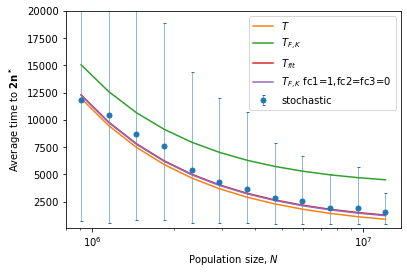

In [6]:
Nred2=Nvy[29:41]
plt.errorbar(Nred2, meansyvN[29:41],yerr=err595pN[:,29:41], fmt='o', label='stochastic', elinewidth=.5, capsize=1.5, ms=5)
plt.plot(Nred2, Ta.T(Nred2,5e-9,5e-6,1.09,1.1,1.11),'-',label='$T$')
plt.plot(Nred2, Ta.T_K(Nred2,5e-9,5e-6,1.09,1.1,1.11,True),'-',label='$T_{F,K}$')
plt.plot(Nred2, Ta.waitT(Nred2, 5e-9, Ta.sv(1.09,1.1,1.11)[2])+Ta.T_haldane_ffix(Nred2, Ta.sv(1.09,1.1,1.11)[1]),'-',label='$T_{fit}$')
plt.plot(Nred2, Ta.T_K(Nred2,5e-9,5e-6,1.09,1.1,1.11,True,fc2=0,fc3=0,fc1=1),'-',label='$T_{F,K}$ fc1=1,fc2=fc3=0')

plt.xlabel('Population size, $N$')
plt.xscale('log')
#plt.yscale('log')
plt.ylabel('Average time to $\mathbf{2n^*}$')
#plt.xlim([3e3,1e8])
plt.ylim([1e2,20000])
#plt.savefig('figyoavN.pdf')
plt.legend();

In [7]:
δred=δy[-15:]

''

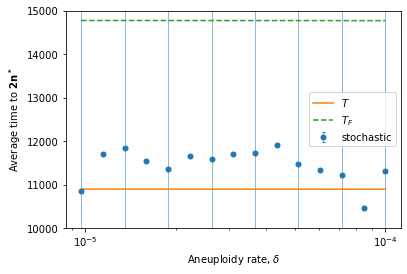

In [8]:
plt.errorbar(δred, np.array(meansyvdelta)[-15:],yerr=err595pδ[:,-15:], fmt='o', label='stochastic', elinewidth=.5, capsize=1.5, ms=5, errorevery=2)
plt.plot(δred,Ta.T(1e6,5e-9,δred,1.09,1.1,1.11),'-',label='$T$')
plt.plot(δred,Ta.T(1e6,5e-9,δred,1.09,1.1,1.11,True),'--',label='$T_F$')
#plt.plot(δy,Ta.T_K(1e6,5e-9,δy,1.09,1.1,1.11,True),'-',label='$T_{F,K}$')
#plt.plot(δy, [Ta.waitT(1e6, 5e-9, Ta.sv(1.09,1.1,1.11)[2])+Ta.T_haldane_ffix(1e6, Ta.sv(1.09,1.1,1.11)[1])for d in δy],'-',label='$T_{fit}$')


plt.xlabel('Aneuploidy rate, $\delta$')
plt.xscale('log')
#plt.yscale('log')
plt.ylim([1e4,15000])
plt.ylabel('Average time to $\mathbf{2n^*}$')
plt.legend(#loc=(.73,.5)
)
#plt.savefig('figyoavdelta_log.pdf')
;

In [9]:
μred2=μy[33:47]

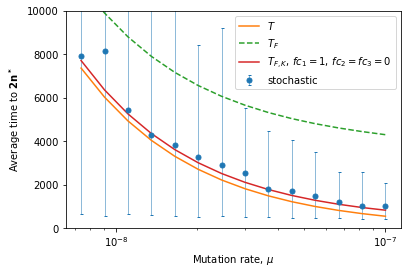

In [10]:
plt.errorbar(μred2, meansyvm[33:47],yerr=err595pμ[:,33:47], fmt='o', label='stochastic', elinewidth=.5, capsize=1.5, ms=5)
plt.plot(μred2,Ta.T(1e6,μred2,5e-6,1.09,1.1,1.11),'-',label='$T$')
plt.plot(μred2,Ta.T(1e6,μred2,5e-6,1.09,1.1,1.11,True),'--',label='$T_F$')
plt.plot(μred2,Ta.T_K(1e6,μred2,5e-6,1.09,1.1,1.11,True,fc1=1,fc2=0,fc3=0),'-',label='$T_{F,K},\, fc_1=1,\,fc_2=fc_3=0$')
#plt.plot(μred,yy5mu, '-',label='wrong $T_{F,K}$')
#plt.plot(μred, Ta.waitT(1e6, μred, Ta.sv(1.09,1.1,1.11)[2])+Ta.T_haldane_ffix(1e6, Ta.sv(1.09,1.1,1.11)[1]),'-',label='$T_{fit}$')


plt.xlabel('Mutation rate, $\mu$')
plt.xscale('log')
#plt.yscale('log')
plt.ylim([0,10000])
plt.ylabel('Average time to $\mathbf{2n^*}$')
#plt.savefig('figyoavmu.pdf')
plt.legend();


# Current parameters from Ilia:

In [2]:
mparams = [6e6,
 9.6e-08, 5.4e-04,
1.021, 1.025, 1.028]

## No Aneuploidy

In [4]:
Nm, msim_noaneuN=np.load('msim_noaneuN.npy',allow_pickle=True)
(msim_noaneuN_aneu, msim_noaneuN_dirmut), (errsim_msim_noaneuN_aneu, errsim_msim_noaneuN_dirmut)=modelext.meanpercerrdiffT(*msim_noaneuN)

C:\Users\aboas\ucloud\PD\aneuploidy\Simulations\Time_approximations.py:32: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(1-(1-rate*np.minimum(1,2*s))**N)
C:\Users\aboas\ucloud\PD\aneuploidy\Simulations\Time_approximations.py:32: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(1-(1-rate*np.minimum(1,2*s))**N)
C:\Users\aboas\ucloud\PD\aneuploidy\Simulations\Time_approximations.py:32: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(1-(1-rate*np.minimum(1,2*s))**N)


''

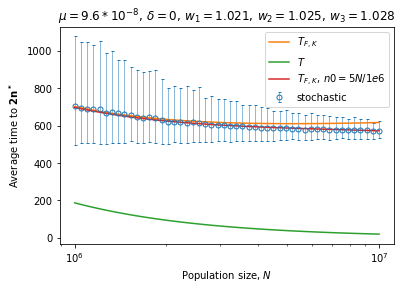

In [4]:
plt.errorbar(Nm, msim_noaneuN_dirmut,yerr=errsim_msim_noaneuN_dirmut, fmt='o', label='stochastic', elinewidth=.5, capsize=1.5, ms=5, markerfacecolor='none')
plt.plot(Nm, Ta.T_K(Nm,9.6e-8,0,1.021,1.025,1.028,True), '-', label='$T_{F,\, K}$')
plt.plot(Nm, Ta.T_K(Nm,9.6e-8,0,1.021,1.025,1.028), '-', label='$T$')
plt.plot(Nm, Ta.T_K(Nm,9.6e-8,0,1.021,1.025,1.028,True,n00=5*Nm/1e6), '-', label='$T_{F,\, K}$, $n0=5N/1e6$')
#plt.plot(Nm, Ta.T_K(Nm,9.6e-8,0,1.021,1.025,1.028,True,n00=9.6e-8*Nm), '-', label='approx, fix time, $n0=\mu N$')
#plt.plot(Nm, Ta.T_mut_K(Nm, 9.6e-8, 1.028, True, fc0=.95), '-', label='approx, fix time')
#plt.plot(Nm, Ta.waitT(Nm, 9.6e-8, Ta.sv(1.021,1.025,1.028)[0]), '-', label='approx wait time')
#plt.plot(Nm, Ta.T_kimura(Nm,  Ta.sv(1.021,1.025,1.028)[0],n0=1), '-', label='approx fix time')

plt.title('$\mu=9.6*10^{-8},\, \delta=0,\, w_1=1.021,\, w_2=1.025,\,w_3=1.028$')
plt.xlabel('Population size, $N$')
plt.xscale('log')
#plt.yscale('log')
plt.ylabel('Average time to $\mathbf{2n^*}$')
#plt.xlim([6e6,1e7])
#plt.ylim([500,700])
plt.legend()
#plt.savefig('figinvpNonlymut_n0.pdf')
;

C:\Users\aboas\ucloud\PD\aneuploidy\Simulations\Time_approximations.py:32: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(1-(1-rate*np.minimum(1,2*s))**N)


''

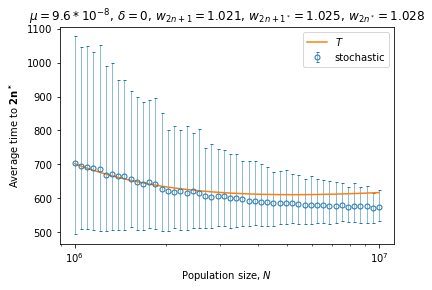

In [33]:
plt.errorbar(Nm, msim_noaneuN_dirmut,yerr=errsim_msim_noaneuN_dirmut, fmt='o', label='stochastic', elinewidth=.5, capsize=1.5, ms=5, markerfacecolor='none')
plt.plot(Nm, Ta.T_K(Nm,9.6e-8,0,1.021,1.025,1.028,True), '-', label='$T$')

plt.title('$\mu=9.6*10^{-8},\, \delta=0,\, w_{2n+1}=1.021,\, w_{2n+1^*}=1.025,\,w_{2n^*}=1.028$')
plt.xlabel('Population size, $N$')
plt.xscale('log')
#plt.yscale('log')
plt.ylabel('Average time to $\mathbf{2n^*}$')
#plt.xlim([6e6,1e7])
#plt.ylim([0,1100])
plt.legend()
#plt.savefig('figinvpNonlymut0.pdf')
;

In [7]:
Nm, msim_noaneuN_manu=np.load('msim_noaneuN_manu.npy',allow_pickle=True)
(msim_noaneuN_manu_aneu, msim_noaneuN_manu_dirmut), (errsim_msim_noaneuN_manu_aneu, errsim_msim_noaneuN_manu_dirmut)=modelext.meanpercerrdiffT(*msim_noaneuN_manu)

C:\Users\aboas\ucloud\PD\aneuploidy\Simulations\Time_approximations.py:32: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(1-(1-rate*np.minimum(1,2*s))**N)


''

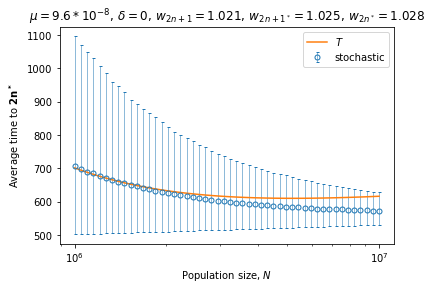

In [7]:
plt.errorbar(Nm, msim_noaneuN_manu_dirmut,yerr=errsim_msim_noaneuN_manu_dirmut, fmt='o', label='stochastic', elinewidth=.5, capsize=1.5, ms=5, markerfacecolor='none')
plt.plot(Nm, Ta.T_K(Nm,9.6e-8,0,1.021,1.025,1.028,True), '-', label='$T$')

plt.title('$\mu=9.6*10^{-8},\, \delta=0,\, w_{2n+1}=1.021,\, w_{2n+1^*}=1.025,\,w_{2n^*}=1.028$')
plt.xlabel('Population size, $N$')
plt.xscale('log')
#plt.yscale('log')
plt.ylabel('Average time to $\mathbf{2n^*}$')
#plt.xlim([6e6,1e7])
#plt.ylim([0,1100])
plt.legend()
#plt.savefig('figinvpNonlymut0.pdf')
;

In [32]:
Nm58, msim_noaneuN_manu58=np.load('msim_noaneuN_manu58.npy',allow_pickle=True)
(msim_noaneuN_manu58_aneu, msim_noaneuN_manu58_dirmut), (errsim_msim_noaneuN_manu58_aneu, errsim_msim_noaneuN_manu58_dirmut)=modelext.meanpercerrdiffT(*msim_noaneuN_manu58)

In [48]:
Ta.waitT(1e7, 9.6e-8, Ta.sv(1.021,1.025,1.028)[0])

19.10567028472923

In [49]:
Nml, msim_noaneuN_l=np.load('msim_noaneuN_l.npy',allow_pickle=True)
(msim_noaneuN_aneu_l, msim_noaneuN_dirmut_l), (errsim_msim_noaneuN_aneu_l, errsim_msim_noaneuN_dirmut_l)=modelext.meanpercerrdiffT(*msim_noaneuN_l)

C:\Users\aboas\ucloud\PD\aneuploidy\Simulations\Time_approximations.py:32: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(1-(1-rate*np.minimum(1,2*s))**N)
C:\Users\aboas\ucloud\PD\aneuploidy\Simulations\Time_approximations.py:32: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(1-(1-rate*np.minimum(1,2*s))**N)


''

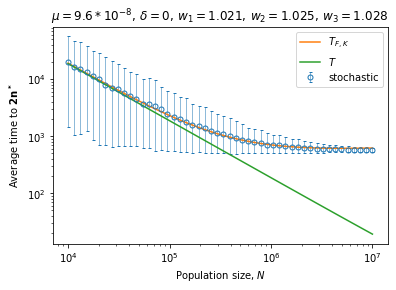

In [55]:
plt.errorbar(Nml, msim_noaneuN_dirmut_l,yerr=errsim_msim_noaneuN_dirmut_l, fmt='o', label='stochastic', elinewidth=.5, capsize=1.5, ms=5, markerfacecolor='none')
plt.plot(Nml, Ta.T_K(Nml,9.6e-8,0,1.021,1.025,1.028,True), '-', label='$T_{F,\, K}$')
plt.plot(Nml, Ta.T_K(Nml,9.6e-8,0,1.021,1.025,1.028), '-', label='$T$')
#plt.plot(Nml, Ta.T_K(Nml,9.6e-8,0,1.021,1.025,1.028,True,n00=5*Nm/1e6), '-', label='$T_{F,\, K}$, $n0=5N/1e6$')
#plt.plot(Nm, Ta.T_K(Nm,9.6e-8,0,1.021,1.025,1.028,True,n00=9.6e-8*Nm), '-', label='approx, fix time, $n0=\mu N$')
#plt.plot(Nm, Ta.T_mut_K(Nm, 9.6e-8, 1.028, True, fc0=.95), '-', label='approx, fix time')
#plt.plot(Nm, Ta.waitT(Nm, 9.6e-8, Ta.sv(1.021,1.025,1.028)[0]), '-', label='approx wait time')
#plt.plot(Nm, Ta.T_kimura(Nm,  Ta.sv(1.021,1.025,1.028)[0],n0=1), '-', label='approx fix time')

plt.title('$\mu=9.6*10^{-8},\, \delta=0,\, w_1=1.021,\, w_2=1.025,\,w_3=1.028$')
plt.xlabel('Population size, $N$')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Average time to $\mathbf{2n^*}$')
#plt.xlim([6e6,1e7])
#plt.ylim([500,700])
plt.legend()
#plt.savefig('figinvpNonlymut_l.pdf')
;

In [37]:
Nm, msim_noaneuN2=np.load('msim_noaneuN2.npy',allow_pickle=True)
(msim_noaneuN_aneu2, msim_noaneuN_dirmut2), (errsim_msim_noaneuN_aneu2, errsim_msim_noaneuN_dirmut2)=modelext.meanpercerrdiffT(*msim_noaneuN2)

C:\Users\aboas\ucloud\PD\aneuploidy\Simulations\Time_approximations.py:32: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(1-(1-rate*np.minimum(1,2*s))**N)
C:\Users\aboas\ucloud\PD\aneuploidy\Simulations\Time_approximations.py:32: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(1-(1-rate*np.minimum(1,2*s))**N)


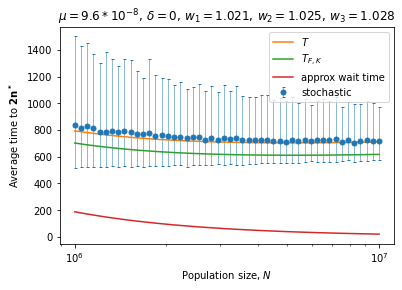

In [39]:
plt.errorbar(Nm, msim_noaneuN_dirmut2,yerr=errsim_msim_noaneuN_dirmut2, fmt='o', label='stochastic', elinewidth=.5, capsize=1.5, ms=5)
plt.plot(Nm, Ta.T(Nm,9.6e-8,0,1.021,1.025,1.028,True), '-', label='$T$')
plt.plot(Nm, Ta.T_K(Nm,9.6e-8,0,1.021,1.025,1.028,True), '-', label='$T_{F,\, K}$')
#plt.plot(Nm, Ta.T_mut(Nm, 9.6e-8, 1.028, True, fc0=.95), '-', label='approx, fix time')
plt.plot(Nm, Ta.waitT(Nm, 9.6e-8, Ta.sv(1.021,1.025,1.028)[0]), '-', label='approx wait time')
#plt.plot(Nm, Ta.T_kimura(Nm,  Ta.sv(1.021,1.025,1.028)[0]), '-', label='approx fix time')
#plt.plot(Nm, Ta.T_haldane(Nm,  Ta.sv(1.021,1.025,1.028)[0]), '-', label='approx fix time')

plt.title('$\mu=9.6*10^{-8},\, \delta=0,\, w_1=1.021,\, w_2=1.025,\,w_3=1.028$')
plt.xlabel('Population size, $N$')
plt.xscale('log')
#plt.yscale('log')
plt.ylabel('Average time to $\mathbf{2n^*}$')
#plt.xlim([3e3,1e8])
#plt.ylim([0,100])
#plt.savefig('figyoavN.pdf')
plt.legend();

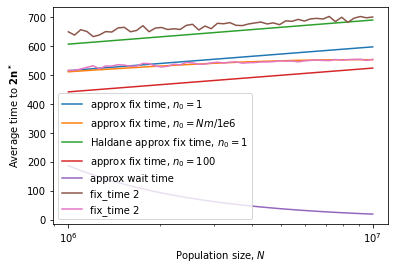

In [13]:
plt.plot(Nm, Ta.T_kimura(Nm,  Ta.sv(1.021,1.025,1.028)[0],n0=1), '-', label='approx fix time, $n_0=1$')
plt.plot(Nm, Ta.T_kimura(Nm,  Ta.sv(1.021,1.025,1.028)[0],n0=5*Nm/1e6), '-', label='approx fix time, $n_0=Nm/1e6$')
plt.plot(Nm, Ta.T_haldane(Nm,  Ta.sv(1.021,1.025,1.028)[0]), '-', label='Haldane approx fix time, $n_0=1$')
plt.plot(Nm, Ta.T_kimura(Nm,  Ta.sv(1.021,1.025,1.028)[0],n0=100), '-', label='approx fix time, $n_0=100$')
plt.plot(Nm, Ta.waitT(Nm, 9.6e-8, Ta.sv(1.021,1.025,1.028)[0]), '-', label='approx wait time')
plt.plot(Nm,  msim_noaneuN_dirmut2-Ta.waitT(Nm, 9.6e-8, Ta.sv(1.021,1.025,1.028)[0]),'-',label='fix_time 2')
plt.plot(Nm,  msim_noaneuN_dirmut-Ta.waitT(Nm, 9.6e-8, Ta.sv(1.021,1.025,1.028)[0]),'-',label='fix_time 2')

plt.xlabel('Population size, $N$')
plt.xscale('log')
#plt.yscale('log')
plt.ylabel('Average time to $\mathbf{2n^*}$')
#plt.xlim([3e3,1e8])
#plt.ylim([0,100])
#plt.savefig('figyoavN.pdf')
plt.legend();

In [6]:
Nm, msim_noaneuN3=np.load('msim_noaneuN3.npy',allow_pickle=True)
(msim_noaneuN_aneu3, msim_noaneuN_dirmut3), (errsim_msim_noaneuN_aneu3, errsim_msim_noaneuN_dirmut3)=modelext.meanpercerrdiffT(*msim_noaneuN3)

C:\Users\aboas\ucloud\PD\aneuploidy\Simulations\Time_approximations.py:32: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(1-(1-rate*np.minimum(1,2*s))**N)
C:\Users\aboas\ucloud\PD\aneuploidy\Simulations\Time_approximations.py:32: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(1-(1-rate*np.minimum(1,2*s))**N)
C:\Users\aboas\ucloud\PD\aneuploidy\Simulations\Time_approximations.py:32: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(1-(1-rate*np.minimum(1,2*s))**N)


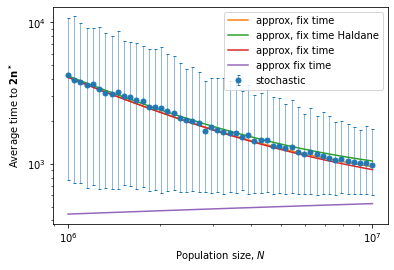

In [8]:
plt.errorbar(Nm, msim_noaneuN_dirmut3,yerr=errsim_msim_noaneuN_dirmut3, fmt='o', label='stochastic', elinewidth=.5, capsize=1.5, ms=5)
plt.plot(Nm, Ta.T_K(Nm,5e-9,0,1.021,1.025,1.028,True), '-', label='approx, fix time')
plt.plot(Nm, Ta.T(Nm,5e-9,0,1.021,1.025,1.028,True), '-', label='approx, fix time Haldane')
plt.plot(Nm, Ta.T_K(Nm,5e-9,0,1.021,1.025,1.028,True,n00=5*Nm/1e6), '-', label='approx, fix time')
#plt.plot(Nm, Ta.T_mut_K(Nm, 9.6e-8, 1.028, True, fc0=.95), '-', label='approx, fix time')
#plt.plot(Nm, Ta.waitT(Nm, 9.6e-8, Ta.sv(1.021,1.025,1.028)[0]), '-', label='approx wait time')
plt.plot(Nm, Ta.T_kimura(Nm,  Ta.sv(1.021,1.025,1.028)[0],n0=100), '-', label='approx fix time')


plt.xlabel('Population size, $N$')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Average time to $\mathbf{2n^*}$')
#plt.xlim([6e6,1e7])
#plt.ylim([0,100])
#plt.savefig('figyoavN.pdf')
plt.legend();

In [54]:
Nm, msim_noaneuN4=np.load('msim_noaneuN4.npy',allow_pickle=True)
(msim_noaneuN_aneu4, msim_noaneuN_dirmut4), (errsim_msim_noaneuN_aneu4, errsim_msim_noaneuN_dirmut4)=modelext.meanpercerrdiffT(*msim_noaneuN4)

C:\Users\aboas\ucloud\PD\aneuploidy\Simulations\Time_approximations.py:32: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(1-(1-rate*np.minimum(1,2*s))**N)
C:\Users\aboas\ucloud\PD\aneuploidy\Simulations\Time_approximations.py:32: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(1-(1-rate*np.minimum(1,2*s))**N)


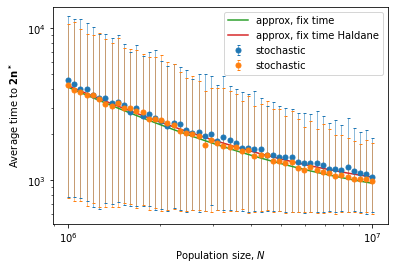

In [57]:
plt.errorbar(Nm, msim_noaneuN_dirmut4,yerr=errsim_msim_noaneuN_dirmut4, fmt='o', label='stochastic', elinewidth=.5, capsize=1.5, ms=5)
plt.errorbar(Nm, msim_noaneuN_dirmut3,yerr=errsim_msim_noaneuN_dirmut3, fmt='o', label='stochastic', elinewidth=.5, capsize=1.5, ms=5)
plt.plot(Nm, Ta.T_K(Nm,5e-9,0,1.021,1.025,1.028,True), '-', label='approx, fix time')
plt.plot(Nm, Ta.T(Nm,5e-9,0,1.021,1.025,1.028,True), '-', label='approx, fix time Haldane')
#plt.plot(Nm, Ta.T_K(Nm,5e-9,0,1.021,1.025,1.028,True,n00=5*Nm/1e6), '-', label='approx, fix time')
#plt.plot(Nm, Ta.T_mut_K(Nm, 9.6e-8, 1.028, True, fc0=.95), '-', label='approx, fix time')
#plt.plot(Nm, Ta.waitT(Nm, 9.6e-8, Ta.sv(1.021,1.025,1.028)[0]), '-', label='approx wait time')
#plt.plot(Nm, Ta.T_kimura(Nm,  Ta.sv(1.021,1.025,1.028)[0],n0=100), '-', label='approx fix time')


plt.xlabel('Population size, $N$')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Average time to $\mathbf{2n^*}$')
#plt.xlim([6e6,1e7])
#plt.ylim([0,100])
#plt.savefig('figyoavN.pdf')
plt.legend();

In [5]:
Nm, msim_noaneuN5=np.load('msim_noaneuN5.npy',allow_pickle=True)

In [13]:
np.mean(msim_noaneuN5[2],axis=0)

array([566.92, 554.48, 565.04, 560.86, 572.74, 564.54, 556.1 , 572.12,
       572.2 , 565.44, 568.02, 570.78, 573.54, 548.6 , 566.14, 563.64,
       574.98, 560.68, 569.72, 556.5 , 572.34, 574.18, 580.68, 557.3 ,
       563.54, 566.12, 568.36, 569.78, 572.94, 558.6 , 564.96, 573.4 ,
       556.38, 563.02, 565.34, 565.54, 561.38, 556.94, 560.2 , 573.14,
       565.12, 557.2 , 579.24, 568.44, 552.92, 567.68, 557.94, 559.04,
       573.1 , 566.32])

In [4]:
μm, msim_noaneuμ=np.load('msim_noaneuμ.npy',allow_pickle=True)
(msim_noaneuμ_aneu, msim_noaneuμ_dirmut), (errsim_msim_noaneuμ_aneu, errsim_msim_noaneuμ_dirmut)=modelext.meanpercerrdiffT(*msim_noaneuμ)

C:\Users\aboas\ucloud\PD\aneuploidy\Simulations\Time_approximations.py:32: RuntimeWarning: divide by zero encountered in double_scalars
  return 1/(1-(1-rate*np.minimum(1,2*s))**N)
C:\Users\aboas\ucloud\PD\aneuploidy\Simulations\Time_approximations.py:32: RuntimeWarning: divide by zero encountered in double_scalars
  return 1/(1-(1-rate*np.minimum(1,2*s))**N)


''

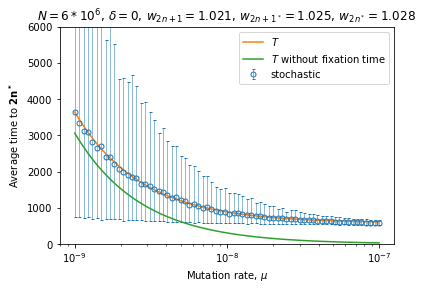

In [66]:
plt.errorbar(μm, msim_noaneuμ_dirmut,yerr=errsim_msim_noaneuμ_dirmut, fmt='o', label='stochastic', elinewidth=.5, capsize=1.5, ms=5, markerfacecolor='none')
plt.plot(μm, Ta.T_K(6e6,μm,0,1.021,1.025,1.028,True), '-', label='$T$')
plt.plot(μm, Ta.T_K(6e6,μm,0,1.021,1.025,1.028), '-', label='$T$ without fixation time')
#plt.plot(μm, Ta.T_mut_K(6e6, μm, 1.028, True, fc0=.95), '-', label='approx, fix time')
#plt.plot(μm, Ta.waitT(6e6, μm, Ta.sv(1.021,1.025,1.028)[0]), '-', label='approx wait time')
#plt.plot(μm, [Ta.T_kimura(6e6, Ta.sv(1.021,1.025,1.028)[0])for m in μm], '-', label='approx fix time Kim')
#plt.plot(μm, [Ta.T_haldane(6e6, Ta.sv(1.021,1.025,1.028)[0])for m in μm], '-', label='approx fix time Hal')

plt.title('$N=6*10^6,\, \delta=0,\, w_{2n+1}=1.021,\, w_{2n+1^*}=1.025,\,w_{2n^*}=1.028$')
plt.xlabel('Mutation rate, $μ$')
plt.xscale('log')
#plt.yscale('log')
plt.ylabel('Average time to $\mathbf{2n^*}$')
#plt.xlim([5e-8,1e-7])
plt.ylim([0,6000])
plt.legend()
plt.savefig('figinvpmuonlymut0.pdf')
;

C:\Users\aboas\ucloud\PD\aneuploidy\Simulations\Time_approximations.py:32: RuntimeWarning: divide by zero encountered in double_scalars
  return 1/(1-(1-rate*np.minimum(1,2*s))**N)


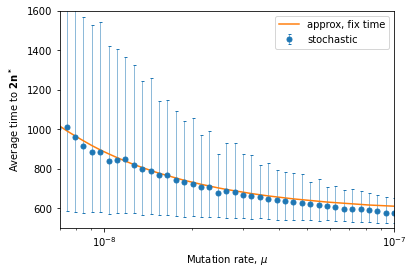

In [10]:
plt.errorbar(μm, msim_noaneuμ_dirmut,yerr=errsim_msim_noaneuμ_dirmut, fmt='o', label='stochastic', elinewidth=.5, capsize=1.5, ms=5)
plt.plot(μm, Ta.T_K(6e6,μm,0,1.021,1.025,1.028,True), '-', label='approx, fix time')
#plt.plot(μm, Ta.T_mut_K(6e6, μm, 1.028, True, fc0=.95), '-', label='approx, fix time')
#plt.plot(μm, Ta.waitT(6e6, μm, Ta.sv(1.021,1.025,1.028)[0]), '-', label='approx wait time')
#plt.plot(μm, [Ta.T_kimura(6e6, Ta.sv(1.021,1.025,1.028)[0])for m in μm], '-', label='approx fix time Kim')
#plt.plot(μm, [Ta.T_haldane(6e6, Ta.sv(1.021,1.025,1.028)[0])for m in μm], '-', label='approx fix time Hal')

plt.xlabel('Mutation rate, $μ$')
plt.xscale('log')
#plt.yscale('log')
plt.ylabel('Average time to $\mathbf{2n^*}$')
plt.xlim([7e-9,1e-7])
plt.ylim([500,1600])
#plt.savefig('figyoavN.pdf')
plt.legend();

C:\Users\aboas\ucloud\PD\aneuploidy\Simulations\Time_approximations.py:32: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(1-(1-rate*np.minimum(1,2*s))**N)
C:\Users\aboas\ucloud\PD\aneuploidy\Simulations\Time_approximations.py:32: RuntimeWarning: divide by zero encountered in double_scalars
  return 1/(1-(1-rate*np.minimum(1,2*s))**N)


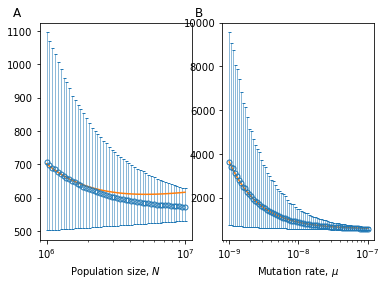

In [28]:
plt.subplot(1,2,1)
plt.errorbar(Nm, msim_noaneuN_manu_dirmut,yerr=errsim_msim_noaneuN_manu_dirmut, fmt='o', label='stochastic', elinewidth=.5, capsize=1.5, ms=5, markerfacecolor='none')
plt.plot(Nm, Ta.T_K(Nm,9.6e-8,0,1.021,1.025,1.028,True), '-', label='$T$')
#plt.title('$\mu=9.6*10^{-8},\, \delta=0,\, w_{2n+1}=1.021,\, w_{2n+1^*}=1.025,\,w_{2n^*}=1.028$')
plt.xlabel('Population size, $N$')
plt.xscale('log')
#plt.ylabel('Average time to $\mathbf{2n^*}$')
plt.title('A',x=-.15,y=1)
#plt.figure(figsize=(10,5))

plt.subplot(1,2,2)
plt.errorbar(μm, msim_noaneuμ_manu_dirmut,yerr=errsim_msim_noaneuμ_manu_dirmut, fmt='o', label='stochastic', elinewidth=.5, capsize=1.5, ms=5, markerfacecolor='none')
plt.plot(μm, Ta.T_K(6e6,μm,0,1.021,1.025,1.028,True), '-', label='approx, fix time')
plt.xlabel('Mutation rate, $μ$')
plt.xscale('log')
plt.title('B',x=-.15,y=1)
#plt.ylabel('Average time to $\mathbf{2n^*}$')
#plt.xlim([7e-9,1e-7])
plt.show()

C:\Users\aboas\ucloud\PD\aneuploidy\Simulations\Time_approximations.py:32: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(1-(1-rate*np.minimum(1,2*s))**N)
C:\Users\aboas\ucloud\PD\aneuploidy\Simulations\Time_approximations.py:32: RuntimeWarning: divide by zero encountered in double_scalars
  return 1/(1-(1-rate*np.minimum(1,2*s))**N)


''

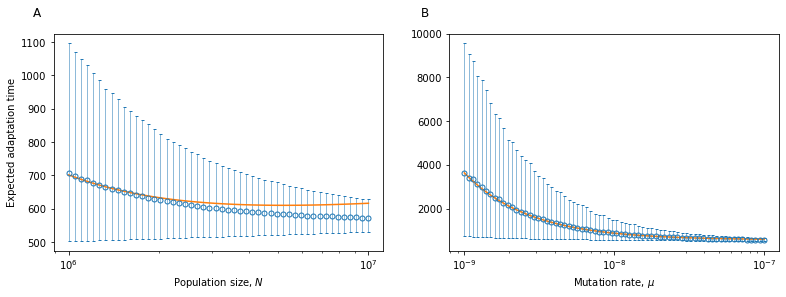

In [30]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(13, 4)#, sharey=True
                              )
ax1.set_title('A',x=-.05,y=1.05)
ax1.set_ylabel('Expected adaptation time')
ax1.errorbar(Nm, msim_noaneuN_manu_dirmut,yerr=errsim_msim_noaneuN_manu_dirmut, fmt='o', label='stochastic', elinewidth=.5, capsize=1.5, ms=5, markerfacecolor='none')
ax1.plot(Nm, Ta.T_K(Nm,9.6e-8,0,1.021,1.025,1.028,True), '-', label='$T$')
#ax1.legend()
ax1.set_xlabel('Population size, $N$')
ax1.set_xscale('log')

ax2.errorbar(μm, msim_noaneuμ_manu_dirmut,yerr=errsim_msim_noaneuμ_manu_dirmut, fmt='o', label='stochastic', elinewidth=.5, capsize=1.5, ms=5, markerfacecolor='none')
ax2.plot(μm, Ta.T_K(6e6,μm,0,1.021,1.025,1.028,True), '-', label='$T$')
ax2.set_xlabel('Mutation rate, $μ$')
#ax2.set_ylim([500,4000])
ax2.set_xscale('log')
#ax2.legend()
ax2.set_title('B',x=-.075,y=1.05)
#fig.savefig('figgrid_noaneu.pdf')
;

In [331]:
Nm58[29],μm[-2]

(5963623, 9.354368899026163e-08)

In [334]:
msim_noaneuN_manu58_dirmut[29],msim_noaneuμ_manu_dirmut[-2]

(581.3916, 581.2422)

C:\Users\aboas\ucloud\PD\aneuploidy\Simulations\Time_approximations.py:32: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(1-(1-rate*np.minimum(1,2*s))**N)
C:\Users\aboas\ucloud\PD\aneuploidy\Simulations\Time_approximations.py:32: RuntimeWarning: divide by zero encountered in double_scalars
  return 1/(1-(1-rate*np.minimum(1,2*s))**N)


''

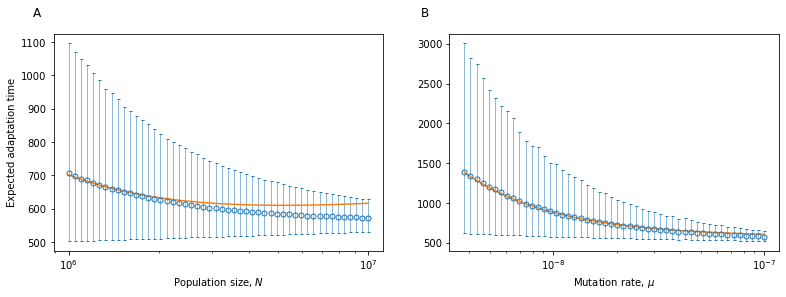

In [31]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(13, 4)#, sharey=True
                              )
ax1.set_title('A',x=-.05,y=1.05)
ax1.set_ylabel('Expected adaptation time')
ax1.errorbar(Nm, msim_noaneuN_manu_dirmut,yerr=errsim_msim_noaneuN_manu_dirmut, fmt='o', label='stochastic', elinewidth=.5, capsize=1.5, ms=5, markerfacecolor='none')
ax1.plot(Nm, Ta.T_K(Nm,9.6e-8,0,1.021,1.025,1.028,True), '-', label='$T$')
#ax1.legend()
ax1.set_xlabel('Population size, $N$')
ax1.set_xscale('log')

ax2.errorbar(μm[20:], msim_noaneuμ_manu_dirmut[20:],yerr=errsim_msim_noaneuμ_manu_dirmut[:,20:], fmt='o', label='stochastic', elinewidth=.5, capsize=1.5, ms=5, markerfacecolor='none')
ax2.plot(μm[20:], Ta.T_K(6e6,μm[20:],0,1.021,1.025,1.028,True), '-', label='$T$')
ax2.set_xlabel('Mutation rate, $μ$')
#ax2.set_ylim([500,4000])
ax2.set_xscale('log')
#ax2.legend()
ax2.set_title('B',x=-.075,y=1.05)
#fig.savefig('figgrid_noaneu.pdf')
;

C:\Users\aboas\ucloud\PD\aneuploidy\Simulations\Time_approximations.py:32: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(1-(1-rate*np.minimum(1,2*s))**N)
C:\Users\aboas\ucloud\PD\aneuploidy\Simulations\Time_approximations.py:32: RuntimeWarning: divide by zero encountered in double_scalars
  return 1/(1-(1-rate*np.minimum(1,2*s))**N)


''

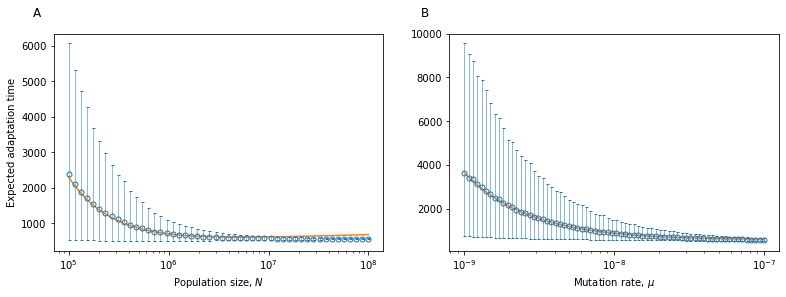

In [34]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(13, 4)#, sharey=True
                              )
ax1.set_title('A',x=-.05,y=1.05)
ax1.set_ylabel('Expected adaptation time')
ax1.errorbar(Nm58, msim_noaneuN_manu58_dirmut,yerr=errsim_msim_noaneuN_manu58_dirmut, fmt='o', label='stochastic', elinewidth=.5, capsize=1.5, ms=5, markerfacecolor='none')
ax1.plot(Nm58, Ta.T_K(Nm58,9.6e-8,0,1.021,1.025,1.028,True), '-', label='$T$')
#ax1.plot(Nm58, Ta.T_K(Nm58,9.6e-8,0,1.021,1.025,1.028,True,n00=3.5*Nm58/1e6),'--',label='diff n0')
#ax1.set_xlim([1e5,5e6])
#ax1.set_ylim([500,750])
ax1.set_xlabel('Population size, $N$')
ax1.set_xscale('log')

ax2.errorbar(μm, msim_noaneuμ_manu_dirmut,yerr=errsim_msim_noaneuμ_manu_dirmut, fmt='o', label='stochastic', elinewidth=.5, capsize=1.5, ms=5, markerfacecolor='none')
ax2.plot(μm, Ta.T_K(6e6,μm,0,1.021,1.025,1.028,True), '-', label='$T$')
ax2.set_xlabel('Mutation rate, $μ$')
#ax2.set_ylim([500,4000])
ax2.set_xscale('log')
#ax2.legend()
ax2.set_title('B',x=-.075,y=1.05)
#fig.savefig('figgrid_noaneu.pdf')
;

In [ ]:
msim_noaneuN_manu58_dirmut

In [24]:
μm, msim_noaneuμ_manu=np.load('msim_noaneuμ_manu.npy',allow_pickle=True)
(msim_noaneuμ_manu_aneu, msim_noaneuμ_manu_dirmut), (errsim_msim_noaneuμ_manu_aneu, errsim_msim_noaneuμ_manu_dirmut)=modelext.meanpercerrdiffT(*msim_noaneuμ_manu)

C:\Users\aboas\ucloud\PD\aneuploidy\Simulations\Time_approximations.py:32: RuntimeWarning: divide by zero encountered in double_scalars
  return 1/(1-(1-rate*np.minimum(1,2*s))**N)


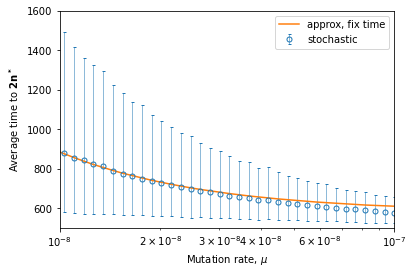

In [25]:
plt.errorbar(μm, msim_noaneuμ_manu_dirmut,yerr=errsim_msim_noaneuμ_manu_dirmut, fmt='o', label='stochastic', elinewidth=.5, capsize=1.5, ms=5, markerfacecolor='none')
plt.plot(μm, Ta.T_K(6e6,μm,0,1.021,1.025,1.028,True), '-', label='approx, fix time')
#plt.plot(μm, Ta.T_mut_K(6e6, μm, 1.028, True, fc0=.95), '-', label='approx, fix time')
#plt.plot(μm, Ta.waitT(6e6, μm, Ta.sv(1.021,1.025,1.028)[0]), '-', label='approx wait time')
#plt.plot(μm, [Ta.T_kimura(6e6, Ta.sv(1.021,1.025,1.028)[0])for m in μm], '-', label='approx fix time Kim')
#plt.plot(μm, [Ta.T_haldane(6e6, Ta.sv(1.021,1.025,1.028)[0])for m in μm], '-', label='approx fix time Hal')

plt.xlabel('Mutation rate, $μ$')
plt.xscale('log')
#plt.yscale('log')
plt.ylabel('Average time to $\mathbf{2n^*}$')
plt.xlim([1e-8,1e-7])
plt.ylim([500,1600])
#plt.savefig('figyoavN.pdf')
plt.legend();

In [22]:
μm, msim_noaneuμ2=np.load('msim_noaneuμ2.npy',allow_pickle=True)
(msim_noaneuμ_aneu2, msim_noaneuμ_dirmut2), (errsim_msim_noaneuμ_aneu2, errsim_msim_noaneuμ_dirmut2)=modelext.meanpercerrdiffT(*msim_noaneuμ2)

C:\Users\aboas\ucloud\PD\aneuploidy\Simulations\Time_approximations.py:32: RuntimeWarning: divide by zero encountered in double_scalars
  return 1/(1-(1-rate*np.minimum(1,2*s))**N)
C:\Users\aboas\ucloud\PD\aneuploidy\Simulations\Time_approximations.py:32: RuntimeWarning: divide by zero encountered in double_scalars
  return 1/(1-(1-rate*np.minimum(1,2*s))**N)


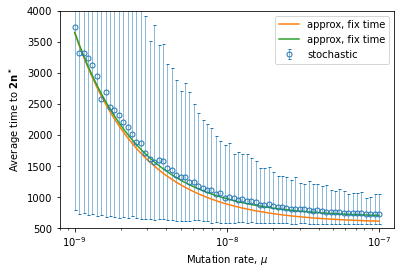

In [23]:
plt.errorbar(μm, msim_noaneuμ_dirmut2,yerr=errsim_msim_noaneuμ_dirmut2, fmt='o', label='stochastic', elinewidth=.5, capsize=1.5, ms=5, markerfacecolor='none')
plt.plot(μm, Ta.T_K(6e6,μm,0,1.021,1.025,1.028,True,fc0=.95), '-', label='approx, fix time')
plt.plot(μm, Ta.T(6e6,μm,0,1.021,1.025,1.028,True,fc0=.95), '-', label='approx, fix time')
#plt.plot(μm, Ta.T_mut(6e6, μm, 1.028, True, fc0=.95), '-', label='approx, fix time')
#plt.plot(μm, Ta.waitT(6e6, μm, Ta.sv(1.021,1.025,1.028)[0]), '-', label='approx wait time')
#plt.plot(μm, [Ta.T_kimura(6e6, Ta.sv(1.021,1.025,1.028)[0])for m in μm], '-', label='approx fix time Kim')
#plt.plot(μm, [Ta.T_haldane(6e6, Ta.sv(1.021,1.025,1.028)[0])for m in μm], '-', label='approx fix time Hal')

plt.xlabel('Mutation rate, $μ$')
plt.xscale('log')
#plt.yscale('log')
plt.ylabel('Average time to $\mathbf{2n^*}$')
#plt.xlim([500,4000])
plt.ylim([500,4000])
#plt.savefig('figyoavN.pdf')
plt.legend();

## No clonal interference

In [ ]:
9.6e-08, 5.4e-04

In [56]:
Nm, msim_nocloN=np.load('msim_nocloN.npy',allow_pickle=True)
(msim_nocloN_aneu, msim_nocloN_dirmut), (errsim_msim_nocloN_aneu, errsim_msim_nocloN_dirmut)=modelext.meanpercerrdiffT(*msim_nocloN)

In [21]:
msim_nocloN_totmean=np.mean(msim_nocloN[0].tolist(),axis=1)

C:\Users\aboas\ucloud\PD\aneuploidy\Simulations\Time_approximations.py:106: RuntimeWarning: divide by zero encountered in log
  T_ret=np.log(fixation_cutoff*N/(1-fixation_cutoff)) / np.log(1+s)


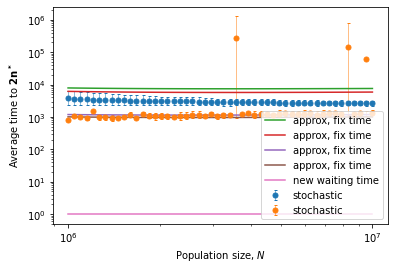

In [121]:
plt.errorbar(Nm, msim_nocloN_aneu,yerr=errsim_msim_nocloN_aneu, fmt='o', label='stochastic', elinewidth=.5, capsize=1.5, ms=5)
plt.errorbar(Nm, msim_nocloN_dirmut,yerr=errsim_msim_nocloN_dirmut, fmt='o', label='stochastic', elinewidth=.5, capsize=1.5, ms=5)
#plt.plot(Nm, Ta.T_K(Nm,9.6e-08,5.4e-04,1.021,1.025,1.028,True,fc0=.95), '-', label='approx, fix time')
plt.plot(Nm, Ta.T_aneu(Nm, 9.6e-08,5.4e-04,1.021,1.025, 1.028, True,fc3=.95,fc2=0), '-', label='approx, fix time')
plt.plot(Nm, Ta.T_aneu_K(Nm, 9.6e-08,5.4e-04,1.021,1.025, 1.028, True,fc3=.95,fc2=0), '-', label='approx, fix time')

plt.plot(Nm, Ta.T_mut(Nm, 9.6e-08, 1.028, True, fc0=1), '-', label='approx, fix time')
plt.plot(Nm, Ta.T_mut_K(Nm, 9.6e-08, 1.028, True, fc0=1), '-', label='approx, fix time')



plt.xlabel('Population size, $N$')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Average time to $\mathbf{2n^*}$')
#plt.xlim([500,4000])
#plt.ylim([500,4000])
#plt.savefig('figyoavN.pdf')
plt.legend();

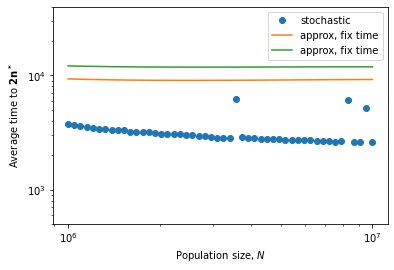

In [31]:
plt.plot(Nm, msim_nocloN_totmean, 'o', label='stochastic')

plt.plot(Nm, Ta.T_K(Nm,9.6e-08,5.4e-04,1.021,1.025,1.028,True,fc0=.95), '-', label='approx, fix time')
plt.plot(Nm, Ta.T(Nm,9.6e-08,5.4e-04,1.021,1.025,1.028,True,fc0=.95), '-', label='approx, fix time')

plt.xlabel('Population size, $N$')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Average time to $\mathbf{2n^*}$')
#plt.xlim([500,4000])
plt.ylim([500,40000])
#plt.savefig('figyoavN.pdf')
plt.legend();

In [44]:
dirmutlenN=np.array([len(msim_nocloN[1][i]) for i in range(50)])
probdirmutfirstN=dirmutlenN/np.shape(msim_nocloN[0][0])
probdirmutfirstN

array([0.002, 0.004, 0.004, 0.012, 0.004, 0.008, 0.006, 0.014, 0.006,
       0.004, 0.018, 0.004, 0.006, 0.016, 0.014, 0.006, 0.008, 0.01 ,
       0.012, 0.02 , 0.016, 0.018, 0.006, 0.02 , 0.026, 0.016, 0.008,
       0.012, 0.004, 0.008, 0.012, 0.016, 0.032, 0.016, 0.02 , 0.03 ,
       0.036, 0.024, 0.036, 0.03 , 0.04 , 0.03 , 0.03 , 0.04 , 0.034,
       0.024, 0.032, 0.05 , 0.042, 0.056])

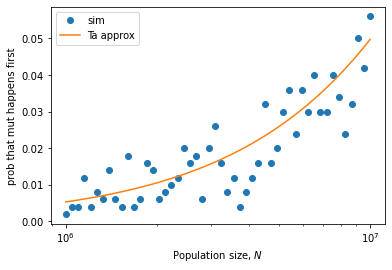

In [53]:
plt.plot(Nm,probdirmutfirstN,'o',label='sim')
plt.plot(Nm,1-Ta.probaneufirst(Nm,9.6e-08,5.4e-04,1.021,1.028),'-',label='Ta approx')

plt.xlabel('Population size, $N$')
plt.xscale('log')
#plt.ylim([0,20000])
plt.ylabel('prob that mut happens first')
#plt.savefig('figyoavδ_noclo.pdf')
plt.legend();

In [5]:
Nml, msim_nocloN_l=np.load('msim_nocloN_long.npy',allow_pickle=True)
(msim_nocloN_l_aneu, msim_nocloN_l_dirmut), (errsim_msim_nocloN_l_aneu, errsim_msim_nocloN_l_dirmut)=modelext.meanpercerrdiffT(*msim_nocloN_l)

In [75]:
msim_nocloN_l_totmean=np.mean(msim_nocloN_l[0].tolist(),axis=1)

C:\Users\aboas\ucloud\PD\aneuploidy\Simulations\Time_approximations.py:106: RuntimeWarning: divide by zero encountered in log
  T_ret=np.log(fixation_cutoff*N/(1-fixation_cutoff)) / np.log(1+s)


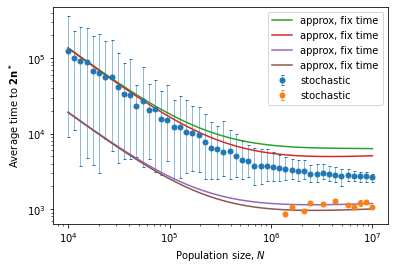

In [73]:
plt.errorbar(Nml, msim_nocloN_l_aneu,yerr=errsim_msim_nocloN_l_aneu, fmt='o', label='stochastic', elinewidth=.5, capsize=1.5, ms=5)
plt.errorbar(Nml, msim_nocloN_l_dirmut,yerr=errsim_msim_nocloN_l_dirmut, fmt='o', label='stochastic', elinewidth=.5, capsize=1.5, ms=5)
#plt.plot(Nm, Ta.T_K(Nm,9.6e-08,5.4e-04,1.021,1.025,1.028,True,fc0=.95), '-', label='approx, fix time')
plt.plot(Nml, Ta.probaneufirst(Nml,9.6e-08,5.4e-04,1.021, 1.028)*Ta.T_aneu(Nml, 9.6e-08,5.4e-04,1.021,1.025, 1.028, True,fc3=.95,fc2=0,fc1=0), '-', label='approx, fix time')
#plt.plot(Nml, Ta.T_aneu(Nml, 9.6e-08,5.4e-04,1.021,1.025, 1.028), '-', label='approx, fix time')
plt.plot(Nml, Ta.T_aneu_K(Nml, 9.6e-08,5.4e-04,1.021,1.025, 1.028, True,fc3=.95,fc2=0,fc1=0), '-', label='approx, fix time')

plt.plot(Nml, Ta.T_mut(Nml, 9.6e-08, 1.028, True, fc0=1), '-', label='approx, fix time')
plt.plot(Nml, Ta.T_mut_K(Nml, 9.6e-08, 1.028, True, fc0=1), '-', label='approx, fix time')


plt.xlabel('Population size, $N$')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Average time to $\mathbf{2n^*}$')
#plt.xlim([500,4000])
#plt.ylim([500,4000])
#plt.savefig('figyoavN.pdf')
plt.legend();

C:\Users\aboas\ucloud\PD\aneuploidy\Simulations\Time_approximations.py:106: RuntimeWarning: divide by zero encountered in log
  T_ret=np.log(fixation_cutoff*N/(1-fixation_cutoff)) / np.log(1+s)


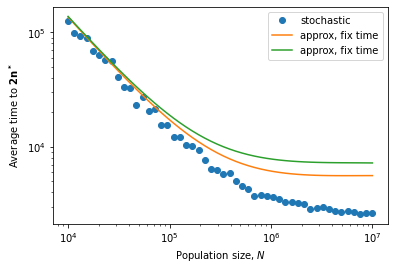

In [79]:
plt.plot(Nml, msim_nocloN_l_totmean, 'o', label='stochastic')

plt.plot(Nml, Ta.T_K(Nml,9.6e-08,5.4e-04,1.021,1.025,1.028,True,fc0=.95,fc2=0), '-', label='approx, fix time')
plt.plot(Nml, Ta.T(Nml,9.6e-08,5.4e-04,1.021,1.025,1.028,True,fc0=.95,fc2=0), '-', label='approx, fix time')

plt.xlabel('Population size, $N$')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Average time to $\mathbf{2n^*}$')
#plt.xlim([500,4000])
#plt.ylim([500,40000])
#plt.savefig('figyoavN.pdf')
plt.legend();

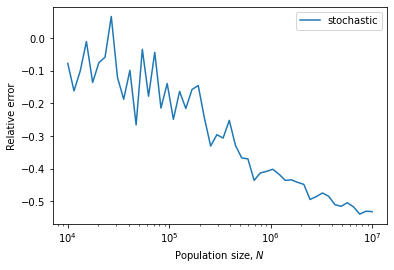

In [87]:
plt.plot(Nml, (msim_nocloN_l_totmean-Ta.T_K(Nml,9.6e-08,5.4e-04,1.021,1.025,1.028,True,fc0=.95,fc2=0))/Ta.T_K(Nml,9.6e-08,5.4e-04,1.021,1.025,1.028,True,fc0=.95,fc2=0), '-', label='stochastic')


plt.xlabel('Population size, $N$')
plt.xscale('log')
plt.ylabel('Relative error')
#plt.xlim([500,4000])
#plt.ylim([500,40000])
#plt.savefig('figyoavN.pdf')
plt.legend();

In [89]:
μm, msim_nocloμ=np.load('msim_nocloμ.npy',allow_pickle=True)
(msim_nocloμ_aneu, msim_nocloμ_dirmut), (errsim_msim_nocloμ_aneu, errsim_msim_nocloμ_dirmut)=modelext.meanpercerrdiffT(*msim_nocloμ)

C:\Users\aboas\ucloud\PD\aneuploidy\Simulations\Time_approximations.py:106: RuntimeWarning: divide by zero encountered in log
  T_ret=np.log(fixation_cutoff*N/(1-fixation_cutoff)) / np.log(1+s)


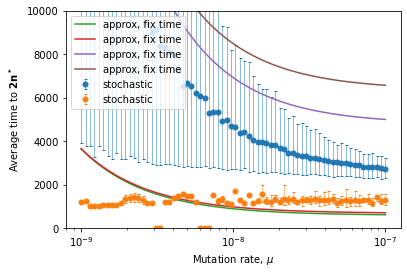

In [91]:
plt.errorbar(μm, msim_nocloμ_aneu,yerr=errsim_msim_nocloμ_aneu, fmt='o', label='stochastic', elinewidth=.5, capsize=1.5, ms=5)
plt.errorbar(μm, msim_nocloμ_dirmut,yerr=errsim_msim_nocloμ_dirmut, fmt='o', label='stochastic', elinewidth=.5, capsize=1.5, ms=5)
plt.plot(μm, Ta.T_mut_K(6e6,μm,1.028,True), '-', label='approx, fix time')
plt.plot(μm, Ta.T_mut(6e6, μm, 1.028, True, fc0=.95), '-', label='approx, fix time')

plt.plot(μm, Ta.T_aneu_K(6e6,μm,5.4e-04,1.021,1.025,1.028,True,fc2=0,fc1=0), '-', label='approx, fix time')
plt.plot(μm, Ta.T_aneu(6e6, μm, 5.4e-04,1.021,1.025, 1.028, True,fc2=0,fc1=0), '-', label='approx, fix time')
#plt.plot(μm, Ta.waitT(6e6, μm, Ta.sv(1.021,1.025,1.028)[0]), '-', label='approx wait time')
#plt.plot(μm, [Ta.T_kimura(6e6, Ta.sv(1.021,1.025,1.028)[0])for m in μm], '-', label='approx fix time Kim')
#plt.plot(μm, [Ta.T_haldane(6e6, Ta.sv(1.021,1.025,1.028)[0])for m in μm], '-', label='approx fix time Hal')

plt.xlabel('Mutation rate, $μ$')
plt.xscale('log')
#plt.yscale('log')
plt.ylabel('Average time to $\mathbf{2n^*}$')
#plt.xlim([500,4000])
plt.ylim([0,10000])
#plt.savefig('figyoavN.pdf')
plt.legend();

In [35]:
δm, msim_nocloδ=np.load('msim_nocloδ.npy',allow_pickle=True)
(msim_nocloδ_aneu, msim_nocloδ_dirmut), (errsim_msim_nocloδ_aneu, errsim_msim_nocloδ_dirmut)=modelext.meanpercerrdiffT(*msim_nocloδ)

C:\Users\aboas\ucloud\PD\aneuploidy\Simulations\Time_approximations.py:106: RuntimeWarning: divide by zero encountered in log
  T_ret=np.log(fixation_cutoff*N/(1-fixation_cutoff)) / np.log(1+s)


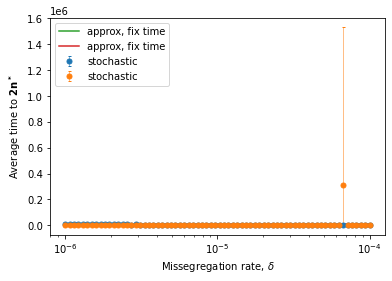

In [43]:
plt.errorbar(δm, msim_nocloδ_aneu,yerr=errsim_msim_nocloδ_aneu, fmt='o', label='stochastic', elinewidth=.5, capsize=1.5, ms=5)
plt.errorbar(δm, msim_nocloδ_dirmut,yerr=errsim_msim_nocloδ_dirmut, fmt='o', label='stochastic', elinewidth=.5, capsize=1.5, ms=5)
#plt.plot(δm, Ta.T_mut_K(6e6,μm,1.028,True), '-', label='approx, fix time')
#plt.plot(δm, Ta.T_mut(6e6, μm, 1.028, True, fc0=.95), '-', label='approx, fix time')

plt.plot(δm, Ta.T_aneu_K(6e6,9.6e-08,δm,1.021,1.025,1.028,True,fc2=0), '-', label='approx, fix time')
plt.plot(δm, Ta.T_aneu(6e6, 9.6e-08, δm,1.021,1.025, 1.028, True,fc2=0), '-', label='approx, fix time')

plt.xlabel('Missegregation rate, $\delta$')
plt.xscale('log')
#plt.yscale('log')
plt.ylabel('Average time to $\mathbf{2n^*}$')
#plt.xlim([500,4000])
#plt.ylim([0,10000])
#plt.savefig('figyoavN.pdf')
plt.legend();

### No direct mutation

In [13]:
Nm58, msim_nodirmutN_manu58=np.load('msim_nodirmutN_manu58.npy',allow_pickle=True)
(msim_nodirmutN_manu58_aneu, msim_nodirmutN_manu58_dirmut), (errsim_msim_nodirmutN_manu58_aneu, errsim_msim_nodirmutN_manu58_dirmut)=modelext.meanpercerrdiffT(*msim_nodirmutN_manu58)

In [2]:
Ta.min_waitT(6e6, 1e-8,0,1.021,1.028)==Ta.waitT_K(6e6,1e-8,0.028)

True

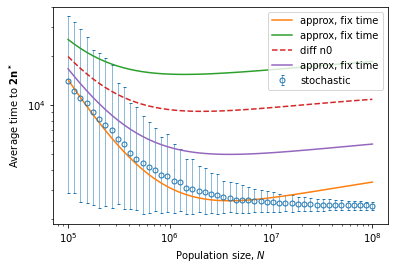

In [14]:
plt.errorbar(Nm58, msim_nodirmutN_manu58_aneu,yerr=errsim_msim_nodirmutN_manu58_aneu, fmt='o', label='stochastic', elinewidth=.5, capsize=1.5, ms=5, markerfacecolor='none')

plt.plot(Nm58, Ta.T_aneu_K(Nm58, 9.6e-08,5.4e-04,1.021,1.025, 1.028, True,fc3=.017,fc2=0,fc1=0), '-', label='approx, fix time')
plt.plot(Nm58, Ta.T_aneu(Nm58, 9.6e-08,5.4e-04,1.021,1.025, 1.028, True, fc3=.95,fc2=1,fc1=1), '-', label='approx, fix time')
#plt.plot(Nm58, Ta.T_aneu(Nm58, 9.6e-08,5.4e-04,1.021,1.025, 1.028, True, fc3=.95,fc2=1,fc1=1,n00=50*/Nm58), '-', label='approx, fix time')
plt.plot(Nm58, Ta.T_aneu_K(Nm58,9.6e-8,5.4e-04,1.021,1.025,1.028,True, n01=Nm58/1e6, n02=Nm58/1e6),'--',label='diff n0')

plt.plot(Nm58, Ta.min_waitT(Nm58,0,5.4e-04,1.021,1.028)+Ta.waitT(Nm58,9.6e-08,Ta.sv(1.021,1.025,1.028)[2])+Ta.waitT(Nm58,5.4e-4,Ta.sv(1.021,1.025,1.028)[3])+Ta.T_kimura(Nm58, Ta.sv(1.021,1.025,1.028)[1],fixation_cutoff=0)+Ta.T_kimura(Nm58, Ta.sv(1.021,1.025,1.028)[2],fixation_cutoff=0)+Ta.T_kimura(Nm58, Ta.sv(1.021,1.025,1.028)[3],fixation_cutoff=.95), '-', label='approx, fix time')
#plt.plot(Nm58, Ta.waitT(Nm58,5.4e-04,Ta.sv(1.021,1.025,1.028)[1])+Ta.waitT(Nm58,9.6e-08,Ta.sv(1.021,1.025,1.028)[2])+Ta.waitT(Nm58,5.4e-4,Ta.sv(1.021,1.025,1.028)[3])+Ta.T_haldane(Nm58, Ta.sv(1.021,1.025,1.028)[1],fixation_cutoff=.95)+Ta.T_haldane(Nm58, Ta.sv(1.021,1.025,1.028)[2],fixation_cutoff=0)+Ta.T_haldane(Nm58, Ta.sv(1.021,1.025,1.028)[3]), '-', label='approx, fix time')


plt.xlabel('Population size, $N$')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Average time to $\mathbf{2n^*}$')
#plt.xlim([6e6,1e7])
#plt.ylim([0,100])
#plt.savefig('figyoavN.pdf')
plt.legend();

In [12]:
μm, msim_nodirmutmu=np.load('msim_nodirmutmu.npy',allow_pickle=True)
(msim_nodirmutmu_aneu, msim_nodirmutmu_dirmut), (errsim_msim_nodirmutmu_aneu, errsim_msim_nodirmutmu_dirmut)=modelext.meanpercerrdiffT(*msim_nodirmutmu)

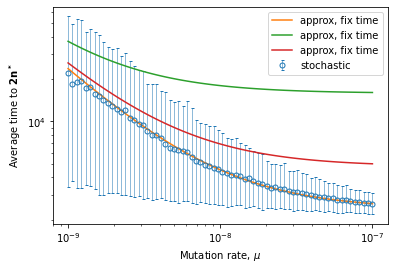

In [15]:
plt.errorbar(μm, msim_nodirmutmu_aneu,yerr=errsim_msim_nodirmutmu_aneu, fmt='o', label='stochastic', elinewidth=.5, capsize=1.5, ms=5, markerfacecolor='none')

plt.plot(μm, Ta.T_aneu_K(6e6, μm,5.4e-04,1.021,1.025, 1.028, True,fc3=.017,fc2=0,fc1=0), '-', label='approx, fix time')
plt.plot(μm, Ta.T_aneu(6e6, μm,5.4e-04,1.021,1.025, 1.028, True, fc3=.95,fc2=1,fc1=1), '-', label='approx, fix time')

plt.plot(μm, Ta.min_waitT(6e6,0,5.4e-04,1.021,1.028)+Ta.waitT(6e6,μm,Ta.sv(1.021,1.025,1.028)[2])+Ta.waitT(6e6,5.4e-4,Ta.sv(1.021,1.025,1.028)[3])+Ta.T_kimura(6e6, Ta.sv(1.021,1.025,1.028)[1],fixation_cutoff=0)+Ta.T_kimura(6e6, Ta.sv(1.021,1.025,1.028)[2],fixation_cutoff=0)+Ta.T_kimura(6e6, Ta.sv(1.021,1.025,1.028)[3],fixation_cutoff=.95), '-', label='approx, fix time')
#plt.plot(μm, Ta.waitT(Nm58,μm,Ta.sv(1.021,1.025,1.028)[1])+Ta.waitT(Nm58,9.6e-08,Ta.sv(1.021,1.025,1.028)[2])+Ta.waitT(Nm58,5.4e-4,Ta.sv(1.021,1.025,1.028)[3])+Ta.T_haldane(Nm58, Ta.sv(1.021,1.025,1.028)[1],fixation_cutoff=.95)+Ta.T_haldane(Nm58, Ta.sv(1.021,1.025,1.028)[2],fixation_cutoff=0)+Ta.T_haldane(Nm58, Ta.sv(1.021,1.025,1.028)[3]), '-', label='approx, fix time')


plt.xlabel('Mutation rate, $\mu$')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Average time to $\mathbf{2n^*}$')
#plt.xlim([6e6,1e7])
#plt.ylim([0,100])
#plt.savefig('figyoavN.pdf')
plt.legend();

In [11]:
δm, msim_nodirmutde=np.load('msim_nodirmutde.npy',allow_pickle=True)
(msim_nodirmutde_aneu, msim_nodirmutde_dirmut), (errsim_msim_nodirmutde_aneu, errsim_msim_nodirmutde_dirmut)=modelext.meanpercerrdiffT(*msim_nodirmutde)

C:\Users\aboas\ucloud\PD\aneuploidy\Simulations\Time_approximations.py:114: RuntimeWarning: divide by zero encountered in log
  T_ret=np.log(fixation_cutoff*N/(1-fixation_cutoff)) / np.log(1+s)


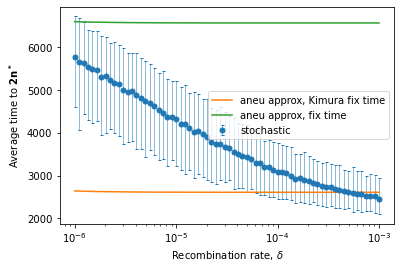

In [16]:
plt.errorbar(δm, msim_nodirmutde_aneu,yerr=errsim_msim_nodirmutde_aneu, fmt='o', label='stochastic', elinewidth=.5, capsize=1.5, ms=5)

plt.plot(δm, Ta.T_aneu_K(6e6,  9.6e-08,δm,1.021,1.025, 1.028, True, fc3=.017,fc2=0,fc1=0), '-', label='aneu approx, Kimura fix time')
plt.plot(δm, Ta.T_aneu(6e6,  9.6e-08,δm,1.021,1.025, 1.028, True, fc3=.95,fc2=0,fc1=0), '-', label='aneu approx, fix time')

#plt.plot(δm, Ta.min_waitT(6e6,0,δm,1.021,1.028)+Ta.waitT(6e6, 9.6e-08,Ta.sv(1.021,1.025,1.028)[2])+Ta.waitT(6e6,δm,Ta.sv(1.021,1.025,1.028)[3])+Ta.T_kimura(6e6, Ta.sv(1.021,1.025,1.028)[1],fixation_cutoff=0)+Ta.T_kimura(6e6, Ta.sv(1.021,1.025,1.028)[2],fixation_cutoff=0)+Ta.T_kimura(6e6, Ta.sv(1.021,1.025,1.028)[3],fixation_cutoff=.95), '-', label='manual approx, Kim fix time')
#plt.plot(μm, Ta.waitT(Nm58,μm,Ta.sv(1.021,1.025,1.028)[1])+Ta.waitT(Nm58,9.6e-08,Ta.sv(1.021,1.025,1.028)[2])+Ta.waitT(Nm58,5.4e-4,Ta.sv(1.021,1.025,1.028)[3])+Ta.T_haldane(Nm58, Ta.sv(1.021,1.025,1.028)[1],fixation_cutoff=.95)+Ta.T_haldane(Nm58, Ta.sv(1.021,1.025,1.028)[2],fixation_cutoff=0)+Ta.T_haldane(Nm58, Ta.sv(1.021,1.025,1.028)[3]), '-', label='approx, fix time')


plt.xlabel('Recombination rate, $\delta$')
plt.xscale('log')
#plt.yscale('log')
plt.ylabel('Average time to $\mathbf{2n^*}$')
#plt.xlim([6e6,1e7])
#plt.ylim([0,100])
#plt.savefig('figyoavN.pdf')
plt.legend();

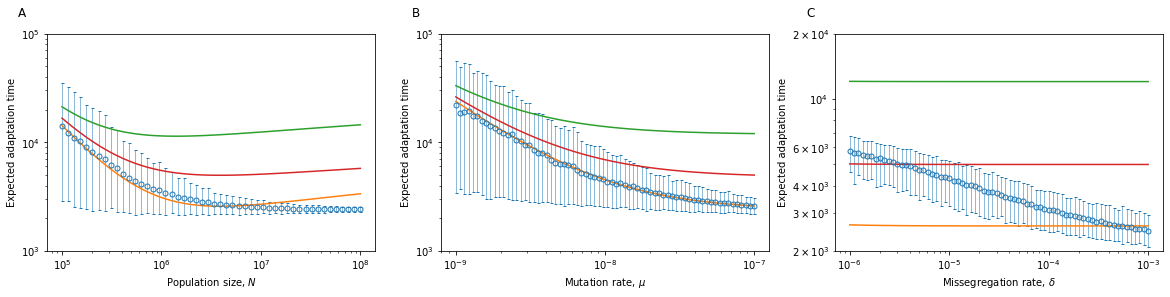

In [20]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 4)#, sharey=True
                              )
ax1.set_title('A',x=-.075,y=1.05)
ax1.set_ylabel('Expected adaptation time')
ax1.errorbar(Nm58, msim_nodirmutN_manu58_aneu,yerr=errsim_msim_nodirmutN_manu58_aneu, fmt='o', label='stochastic', elinewidth=.5, capsize=1.5, ms=5, markerfacecolor='none')
ax1.plot(Nm58, Ta.T_aneu_K(Nm58, 9.6e-08,5.4e-04,1.021,1.025, 1.028, True,fc3=.017,fc2=0,fc1=0), '-', label='approx, fix time')
ax1.plot(Nm58, Ta.T_aneu_K(Nm58, 9.6e-08,5.4e-04,1.021,1.025, 1.028, True,fc3=.95,fc2=1,fc1=1), '-', label='approx, fix time')
ax1.plot(Nm58, Ta.T_aneu_K(Nm58, 9.6e-08,5.4e-04,1.021,1.025, 1.028, True, fc3=.95,fc2=0,fc1=0), '-', label='approx, fix time')
#ax1.set_xlim([1e5,5e6])
ax1.set_ylim([1e3,1e5])
ax1.set_xlabel('Population size, $N$')
ax1.set_xscale('log')
ax1.set_yscale('log')

ax2.set_title('B',x=-.075,y=1.05)
ax2.set_xlabel('Mutation rate, $μ$')
ax2.set_ylabel('Expected adaptation time')
ax2.errorbar(μm, msim_nodirmutmu_aneu,yerr=errsim_msim_nodirmutmu_aneu, fmt='o', label='stochastic', elinewidth=.5, capsize=1.5, ms=5, markerfacecolor='none')
ax2.plot(μm, Ta.T_aneu_K(6e6, μm,5.4e-04,1.021,1.025, 1.028, True,fc3=.017,fc2=0,fc1=0), '-', label='approx, fix time')
ax2.plot(μm, Ta.T_aneu_K(6e6, μm,5.4e-04,1.021,1.025, 1.028, True,fc3=.95,fc2=1,fc1=1), '-', label='approx, fix time')
ax2.plot(μm, Ta.T_aneu_K(6e6, μm,5.4e-04,1.021,1.025, 1.028, True, fc3=.95,fc2=0,fc1=0), '-', label='approx, fix time')
ax2.set_ylim([1e3,1e5])
ax2.set_xscale('log')
ax2.set_yscale('log')
#ax2.legend()

ax3.set_title('C',x=-.075,y=1.05)
ax3.set_xlabel('Missegregation rate, $\delta$')
ax3.set_ylabel('Expected adaptation time')
ax3.errorbar(δm, msim_nodirmutde_aneu,yerr=errsim_msim_nodirmutde_aneu, fmt='o', label='stochastic', elinewidth=.5, capsize=1.5, ms=5, markerfacecolor='none')
ax3.plot(δm, Ta.T_aneu_K(6e6,  9.6e-08,δm,1.021,1.025, 1.028, True, fc3=.017,fc2=0,fc1=0), '-', label='aneu approx, Kimura fix time')
ax3.plot(δm, Ta.T_aneu_K(6e6,  9.6e-08,δm,1.021,1.025, 1.028, True, fc3=.95,fc2=1,fc1=1), '-', label='aneu approx, Kimura fix time')
ax3.plot(δm, Ta.T_aneu_K(6e6,  9.6e-08,δm,1.021,1.025, 1.028, True, fc3=.95,fc2=0,fc1=0), '-', label='aneu approx, Kimura fix time')
ax3.set_ylim([2e3,2e4])
ax3.set_xscale('log')
ax3.set_yscale('log')


#fig.savefig('figgrid_nodirectmut_ylog_uncorr.pdf');

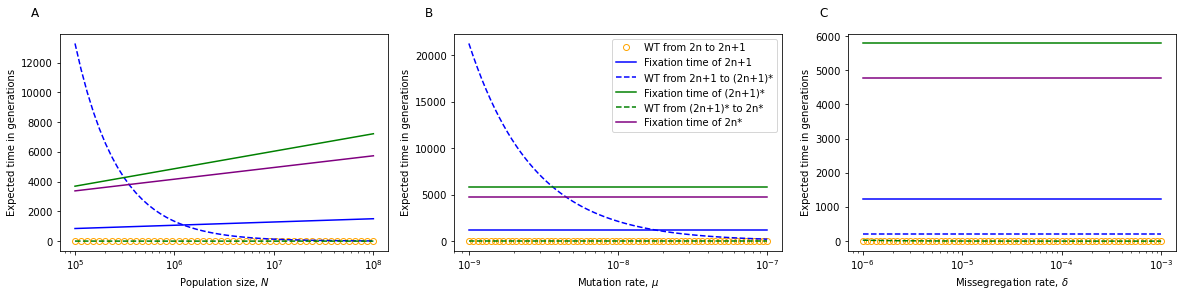

In [21]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 4)#, sharey=True
                              )
ax1.set_title('A',x=-.075,y=1.05)
ax1.set_ylabel('Expected time in generations')
ax1.plot(Nm58,Ta.min_waitT(Nm58, 0, 5.4e-04, 1.021, 1.028),'o',color='orange', label='WT from 2n to 2n+1', markerfacecolor='none')
ax1.plot(Nm58, Ta.T_kimura(Nm58,Ta.sv(1.021,1.025,1.028)[1],1),'-',color='blue',label='Fixation time of 2n+1')
ax1.plot(Nm58,Ta.waitT(Nm58,9.6e-08,Ta.sv(1.021,1.025,1.028)[2]),'--',color='blue',label='WT from 2n+1 to (2n+1)*')
ax1.plot(Nm58, Ta.T_kimura(Nm58,Ta.sv(1.021,1.025,1.028)[2],1),'-',color='green',label='Fixation time of (2n+1)*')
ax1.plot(Nm58,Ta.waitT(Nm58, 5.4e-04,Ta.sv(1.021,1.025,1.028)[3]),'--',color='green',label='WT from (2n+1)* to 2n*')
ax1.plot(Nm58, Ta.T_kimura(Nm58,Ta.sv(1.021,1.025,1.028)[3],.95),'-',color='purple',label='Fixation time of 2n*')
#ax1.set_xlim([1e5,5e6])
#ax1.set_ylim([1e3,1e5])
ax1.set_xlabel('Population size, $N$')
ax1.set_xscale('log')
#ax1.set_yscale('log')

ax2.set_title('B',x=-.075,y=1.05)
ax2.set_xlabel('Mutation rate, $μ$')
ax2.set_ylabel('Expected time in generations')
ax2.plot(μm, [Ta.min_waitT(6e6, 0, 5.4e-04, 1.021, 1.028) for m in μm],'o',color='orange', label='WT from 2n to 2n+1', markerfacecolor='none')
ax2.plot(μm, [Ta.T_kimura(6e6,Ta.sv(1.021,1.025,1.028)[1],1) for m in μm],'-',color='blue',label='Fixation time of 2n+1')
ax2.plot(μm, Ta.waitT(6e6,μm,Ta.sv(1.021,1.025,1.028)[2]),'--',color='blue',label='WT from 2n+1 to (2n+1)*')
ax2.plot(μm, [Ta.T_kimura(6e6,Ta.sv(1.021,1.025,1.028)[2],1) for m in μm],'-',color='green',label='Fixation time of (2n+1)*')
ax2.plot(μm, [Ta.waitT(6e6, 5.4e-04,Ta.sv(1.021,1.025,1.028)[3]) for m in μm],'--',color='green',label='WT from (2n+1)* to 2n*')
ax2.plot(μm, [Ta.T_kimura(6e6,Ta.sv(1.021,1.025,1.028)[3],.95) for m in μm],'-',color='purple',label='Fixation time of 2n*')
#ax2.set_ylim([1e3,1e5])
ax2.set_xscale('log')
#ax2.set_yscale('log')
ax2.legend()

ax3.set_title('C',x=-.075,y=1.05)
ax3.set_xlabel('Missegregation rate, $\delta$')
ax3.set_ylabel('Expected time in generations')
ax3.plot(δm, Ta.min_waitT(6e6, 0, δm, 1.021, 1.028),'o',color='orange', label='WT from 2n to 2n+1', markerfacecolor='none')
ax3.plot(δm, [Ta.T_kimura(6e6,Ta.sv(1.021,1.025,1.028)[1],1) for m in δm],'-',color='blue',label='Fixation time of 2n+1')
ax3.plot(δm, [Ta.waitT(6e6,9.6e-8,Ta.sv(1.021,1.025,1.028)[2]) for m in δm],'--',color='blue',label='WT from 2n+1 to (2n+1)*')
ax3.plot(δm, [Ta.T_kimura(6e6,Ta.sv(1.021,1.025,1.028)[2],1) for m in δm],'-',color='green',label='Fixation time of (2n+1)*')
ax3.plot(δm, Ta.waitT(6e6, δm,Ta.sv(1.021,1.025,1.028)[3]),'--',color='green',label='WT from (2n+1)* to 2n*')
ax3.plot(δm, [Ta.T_kimura(6e6,Ta.sv(1.021,1.025,1.028)[3],.95) for m in δm],'-',color='purple',label='Fixation time of 2n*')
#ax3.set_ylim([1e3,1e4])
ax3.set_xscale('log')
#ax3.set_yscale('log')


#fig.savefig('figgrid_fixT_vs_waitT.pdf');

''

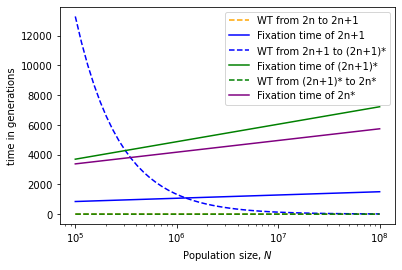

In [18]:
plt.plot(Nm58,Ta.min_waitT(Nm58, 0, 5.4e-04, 1.021, 1.028),'--',color='orange', label='WT from 2n to 2n+1')
plt.plot(Nm58, Ta.T_kimura(Nm58,Ta.sv(1.021,1.025,1.028)[1],1),'-',color='blue',label='Fixation time of 2n+1')
plt.plot(Nm58,Ta.waitT(Nm58,9.6e-08,Ta.sv(1.021,1.025,1.028)[2]),'--',color='blue',label='WT from 2n+1 to (2n+1)*')
plt.plot(Nm58, Ta.T_kimura(Nm58,Ta.sv(1.021,1.025,1.028)[2],1),'-',color='green',label='Fixation time of (2n+1)*')
plt.plot(Nm58,Ta.waitT(Nm58, 5.4e-04,Ta.sv(1.021,1.025,1.028)[3]),'--',color='green',label='WT from (2n+1)* to 2n*')
plt.plot(Nm58, Ta.T_kimura(Nm58,Ta.sv(1.021,1.025,1.028)[3],.95),'-',color='purple',label='Fixation time of 2n*')

plt.xlabel('Population size, $N$')
plt.xscale('log')
#plt.yscale('log')
#plt.ylim([0,5e3])
plt.ylabel('time in generations')
plt.legend()
#plt.savefig('waitT_vs_fixT_smallersel.pdf')
;

''

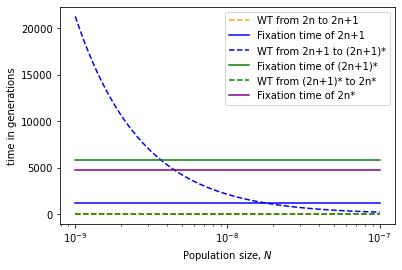

In [402]:
plt.plot(μm, [Ta.min_waitT(6e6, 0, 5.4e-04, 1.021, 1.028) for m in μm],'--',color='orange', label='WT from 2n to 2n+1')
plt.plot(μm, [Ta.T_kimura(6e6,Ta.sv(1.021,1.025,1.028)[1],1) for m in μm],'-',color='blue',label='Fixation time of 2n+1')
plt.plot(μm, Ta.waitT(6e6,μm,Ta.sv(1.021,1.025,1.028)[2]),'--',color='blue',label='WT from 2n+1 to (2n+1)*')
plt.plot(μm, [Ta.T_kimura(6e6,Ta.sv(1.021,1.025,1.028)[2],1) for m in μm],'-',color='green',label='Fixation time of (2n+1)*')
plt.plot(μm, [Ta.waitT(6e6, 5.4e-04,Ta.sv(1.021,1.025,1.028)[3]) for m in μm],'--',color='green',label='WT from (2n+1)* to 2n*')
plt.plot(μm, [Ta.T_kimura(6e6,Ta.sv(1.021,1.025,1.028)[3],.95) for m in μm],'-',color='purple',label='Fixation time of 2n*')

plt.xlabel('Mutation rate, $\mu$')
plt.xscale('log')
#plt.yscale('log')
#plt.ylim([0,5e3])
plt.ylabel('time in generations')
plt.legend()
#plt.savefig('waitT_vs_fixT_smallersel.pdf')
;

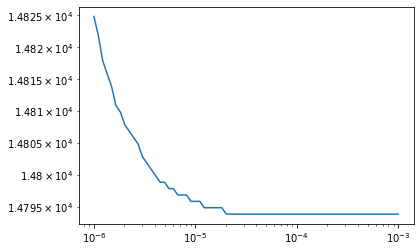

In [448]:
plt.plot(δm, Ta.T_aneu_K(6e6,  9.6e-08,δm,1.021,1.025, 1.028, True, fc3=1,fc2=1,fc1=1), '-', label='aneu approx, Kimura fix time')
plt.xscale('log')
plt.yscale('log')

''

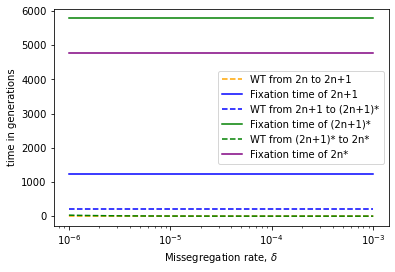

In [403]:
plt.plot(δm, Ta.min_waitT(6e6, 0, δm, 1.021, 1.028),'--',color='orange', label='WT from 2n to 2n+1')
plt.plot(δm, [Ta.T_kimura(6e6,Ta.sv(1.021,1.025,1.028)[1],1) for m in δm],'-',color='blue',label='Fixation time of 2n+1')
plt.plot(δm, [Ta.waitT(6e6,9.6e-8,Ta.sv(1.021,1.025,1.028)[2]) for m in δm],'--',color='blue',label='WT from 2n+1 to (2n+1)*')
plt.plot(δm, [Ta.T_kimura(6e6,Ta.sv(1.021,1.025,1.028)[2],1) for m in δm],'-',color='green',label='Fixation time of (2n+1)*')
plt.plot(δm, Ta.waitT(6e6, δm,Ta.sv(1.021,1.025,1.028)[3]),'--',color='green',label='WT from (2n+1)* to 2n*')
plt.plot(δm, [Ta.T_kimura(6e6,Ta.sv(1.021,1.025,1.028)[3],.95) for m in δm],'-',color='purple',label='Fixation time of 2n*')

plt.xlabel('Missegregation rate, $\delta$')
plt.xscale('log')
#plt.yscale('log')
#plt.ylim([0,5e3])
plt.ylabel('time in generations')
plt.legend()
#plt.savefig('waitT_vs_fixT_smallersel.pdf')
;

In [185]:
Ta.T_aneu_K(6e6,  9.6e-08,1e-4,1.021,1.025, 1.028, True, fc3=.95,fc2=0,fc1=0)-msim_nodirmutde_aneu[-1]

3336.9106478117565

In [169]:
Ta.min_waitT(6e6,0,δm,1.021,1.028)+Ta.waitT(6e6, 9.6e-08,Ta.sv(1.021,1.025,1.028)[2])+Ta.waitT(6e6,δm,Ta.sv(1.021,1.025,1.028)[3])+Ta.T_kimura(6e6, Ta.sv(1.021,1.025,1.028)[1],fixation_cutoff=0)+Ta.T_kimura(6e6, Ta.sv(1.021,1.025,1.028)[2],fixation_cutoff=0)+Ta.T_kimura(6e6, Ta.sv(1.021,1.025,1.028)[3],fixation_cutoff=.95)

array([5031.84027971, 5029.74746832, 5027.78999442, 5025.9591352 ,
       5024.24673179, 5022.64515347, 5021.14726328, 5019.74638539,
       5018.43627731, 5017.21110006, 5016.06539352, 5014.994051  ,
       5013.99229748, 5013.05566735, 5012.179985  , 5011.36134617,
       5010.59610008, 5009.88083342, 5009.2123547 , 5008.58768036,
       5008.00402075, 5007.45876787, 5006.94948344, 5006.47388763,
       5006.02984873, 5005.61537319, 5005.2285963 , 5004.8677735 ,
       5004.53127197, 5004.21756278, 5003.9252135 , 5003.65288109,
       5003.39930528, 5003.16330225, 5002.94375876, 5002.7396267 ,
       5002.54991804, 5002.37370032, 5002.2100926 , 5002.05826207,
       5001.91742122, 5001.78682564, 5001.66577243, 5001.55359917,
       5001.44968332, 5001.35344196, 5001.26433163, 5001.18184817,
       5001.10552623, 5001.03493848, 5000.96969418, 5000.90943734,
       5000.85384425, 5000.80262072, 5000.75549891, 5000.71223417,
       5000.67260186, 5000.63639437, 5000.60341829, 5000.57349

In [175]:
Ta.waitT(6e6, 9.6e-08,Ta.sv(1.021,1.025,1.028)[2])+Ta.T_kimura(6e6, Ta.sv(1.021,1.025,1.028)[1],fixation_cutoff=0)+Ta.T_kimura(6e6, Ta.sv(1.021,1.025,1.028)[2],fixation_cutoff=0)+Ta.T_kimura(6e6, Ta.sv(1.021,1.025,1.028)[3],fixation_cutoff=.95)

4998.375899211791

In [176]:
Ta.min_waitT(6e6,0,δm,1.021,1.028)

array([4.48923169, 4.23447337, 3.99635524, 3.77381602, 3.56586379,
       3.3715716 , 3.19007324, 3.0205595 , 2.86227441, 2.71451195,
       2.57661282, 2.44796148, 2.32798339, 2.21614238, 2.1119382 ,
       2.01490424, 1.92460534, 1.84063577, 1.76261732, 1.69019742,
       1.62304744, 1.56086101, 1.50335242, 1.45025506, 1.40131994,
       1.35631416, 1.31501951, 1.27723096, 1.24275526, 1.21140945,
       1.18301946, 1.15741864, 1.13444635, 1.11394661, 1.09576678,
       1.07975639, 1.06576612, 1.05364703, 1.04325007, 1.03442591,
       1.02702524, 1.02089941, 1.01590156, 1.0118881 , 1.00872052,
       1.00626733, 1.00440603, 1.00302491, 1.00202446, 1.00131833,
       1.00083368, 1.00051089, 1.00030271, 1.00017302, 1.00009515,
       1.00005021, 1.00002536, 1.00001221, 1.00000559, 1.00000243,
       1.00000099, 1.00000038, 1.00000014, 1.00000005, 1.00000001,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [177]:
Ta.waitT(6e6,δm,Ta.sv(1.021,1.025,1.028)[3])

array([28.9751488 , 27.13709574, 25.41773997, 23.80941997, 22.30496878,
       20.89768267, 19.58129082, 18.34992668, 17.19810368, 16.1206889 ,
       15.11288149, 14.1701903 , 13.28841488, 12.46362576, 11.69214758,
       10.97054272, 10.29559553,  9.66429843,  9.07383817,  8.52158373,
        8.0050741 ,  7.52200764,  7.07023181,  6.64773336,  6.25262958,
        5.88315981,  5.53767758,  5.21464332,  4.9126175 ,  4.63025411,
        4.36629483,  4.11956324,  3.88895972,  3.67345642,  3.47209276,
        3.2839711 ,  3.10825272,  2.94415408,  2.79094332,  2.64793694,
        2.51449676,  2.39002702,  2.27397166,  2.16581186,  2.06506359,
        1.97127542,  1.88402639,  1.80292405,  1.72760256,  1.65772093,
        1.59296128,  1.53302724,  1.47764233,  1.42654849,  1.37950455,
        1.33628474,  1.29667729,  1.26048294,  1.22751349,  1.19759038,
        1.17054323,  1.14620842,  1.12442769,  1.10504679,  1.08791426,
        1.07288027,  1.05979577,  1.04851182,  1.03887922,  1.03

In [342]:
Nm58[29], μm[-2], δm[-7]

(5963623, 9.354368899026163e-08, 0.0005484416576121015)

In [343]:
msim_nodirmutN_manu58_aneu[29], msim_nodirmutmu_aneu[-2], msim_nodirmutde_aneu[-7]

(2609.646, 2615.498, 2601.242)

In [358]:
Ta.T_aneu_K(6e6,  9.6e-08, 5.4e-04, 1.021,1.025, 1.028, True,fc3=.017,fc2=0,fc1=0)

2608.0823578380646

# Full model

In [46]:
Nm, msim_N=np.load('msim_N.npy',allow_pickle=True)
(msim_N_aneu, msim_N_dirmut), (errsim_msim_N_aneu, errsim_msim_N_dirmut)=modelext.meanpercerrdiffT(*msim_N)

In [98]:
msim_N

array([[array([  1769.,   4789.,   2373.,   1864.,   2935.,   1666.,   1734.,
         1988.,   2326.,   1591.,   1830.,   2736.,   1924.,   3521.,
         1550.,   1685.,   2519.,   1901.,   2903.,   3219.,   3700.,
         2441.,   4204.,   4585.,   1537.,   1493.,   2034.,   1651.,
         3726.,   5230.,   2081.,   1653.,   1533.,   5756.,   1482.,
         3285.,   2535.,   3031.,   2961.,   3243.,   3589.,   3383.,
         3807.,   3074.,   2458.,   2095.,   1448.,   2221.,   1813.,
         2127.,   4587.,   4210.,   2427.,   3639.,   3974.,   3218.,
         2917.,   2018.,   1488.,   4755.,   1626.,   2072.,   1882.,
         3263.,   3085.,   2490.,   2290.,   1449.,   2937.,   1698.,
         2992.,   2710.,   1916.,   2626.,   1738.,   2974.,   3976.,
         1619.,   2178.,   4865.,   4329.,   3365.,   5446.,   1628.,
         4215.,   1859.,   1953., 386821.,   1680.,   4203.,   2364.,
         3177.,   3909.,   6805.,   1493.,   2942., 914294.,   1867.,
         156

In [47]:
msim_N_totmean=np.mean(msim_N[0].tolist(),axis=1)

C:\Users\aboas\ucloud\PD\aneuploidy\Simulations\Time_approximations.py:114: RuntimeWarning: divide by zero encountered in log
  T_ret=np.log(fixation_cutoff*N/(1-fixation_cutoff)) / np.log(1+s)


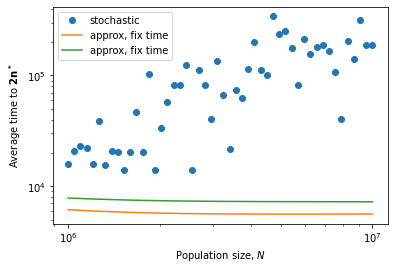

In [48]:
plt.plot(Nm, msim_N_totmean, 'o', label='stochastic')

plt.plot(Nm, Ta.T_K(Nm,9.6e-08,5.4e-04,1.021,1.025,1.028,True,fc0=.95,fc2=0), '-', label='approx, fix time')
plt.plot(Nm, Ta.T(Nm,9.6e-08,5.4e-04,1.021,1.025,1.028,True,fc0=.95,fc2=0), '-', label='approx, fix time')

plt.xlabel('Population size, $N$')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Average time to $\mathbf{2n^*}$')
#plt.xlim([500,4000])
#plt.ylim([500,40000])
#plt.savefig('figyoavN.pdf')
plt.legend();

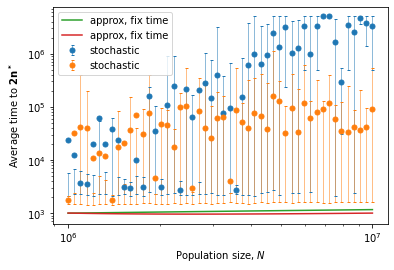

In [71]:
plt.errorbar(Nm, msim_N_aneu,yerr=errsim_msim_N_aneu, fmt='o', label='stochastic', elinewidth=.5, capsize=1.5, ms=5)
plt.errorbar(Nm, msim_N_dirmut,yerr=errsim_msim_N_dirmut, fmt='o', label='stochastic', elinewidth=.5, capsize=1.5, ms=5)
#plt.plot(Nm, Ta.T_K(Nm,9.6e-08,5.4e-04,1.021,1.025,1.028,True,fc0=.95), '-', label='approx, fix time')


plt.plot(Nm, Ta.T_mut(Nm, 9.6e-08,5.4e-04,1.021, 1.028, True, fc0=1), '-', label='approx, fix time')
plt.plot(Nm, Ta.T_mut_K(Nm, 9.6e-08, 1.028, True, fc0=1), '-', label='approx, fix time')


plt.xlabel('Population size, $N$')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Average time to $\mathbf{2n^*}$')
#plt.xlim([500,4000])
#plt.ylim([500,4000])
#plt.savefig('figyoavN.pdf')
plt.legend();

In [114]:
dirmutlenN_f=np.array([len(msim_N[1][i]) for i in range(50)])
probdirmutfirstN_f=dirmutlenN_f/np.shape(msim_N[0][0])
probdirmutfirstN_f

array([0.38, 0.43, 0.5 , 0.5 , 0.48, 0.48, 0.51, 0.48, 0.54, 0.63, 0.53,
       0.62, 0.64, 0.68, 0.69, 0.69, 0.79, 0.72, 0.83, 0.8 , 0.82, 0.75,
       0.83, 0.88, 0.78, 0.87, 0.81, 0.86, 0.9 , 0.87, 0.86, 0.92, 0.93,
       0.92, 0.91, 0.93, 0.91, 0.96, 0.97, 0.9 , 0.97, 0.98, 0.99, 0.97,
       0.98, 0.95, 0.96, 0.94, 0.96, 0.97])

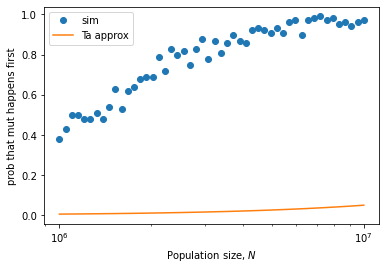

In [115]:
plt.plot(Nm,probdirmutfirstN_f,'o',label='sim')
plt.plot(Nm,1-Ta.probaneufirst(Nm,9.6e-08,5.4e-04,1.021,1.028),'-',label='Ta approx')

plt.xlabel('Population size, $N$')
plt.xscale('log')
#plt.ylim([0,20000])
plt.ylabel('prob that mut happens first')
#plt.savefig('figyoavδ_noclo.pdf')
plt.legend();

In [53]:
Nm, msim_N_2=np.load('msim_N_2.npy',allow_pickle=True)
(msim_N2_aneu, msim_N2_dirmut), (errsim_msim_N2_aneu, errsim_msim_N2_dirmut)=modelext.meanpercerrdiffT(*msim_N_2)

In [109]:
msim_N_2

array([[array([   1685.,    1925.,    1627.,    2966.,    2061.,    3401.,
          4130.,    1795.,    2974.,    3209.,    1846.,    1570.,
          6408.,    4700.,    2486.,    5049.,    3147.,    1479.,
          4649.,    2003.,    3225.,    2187.,    4466.,    2924.,
          3168.,    1737.,    2628.,    2601.,    1458.,   19158.,
          1684.,    2820.,    2783.,  776904.,    1451.,  170404.,
          2774.,    3247.,    1575.,    2064.,    1575.,    2626.,
          2984.,    4293.,    4058.,    1660.,    1733.,    1859.,
          2732.,    1907.,    1965.,    2513.,    2372.,    4205.,
          2037.,    1921.,    1789.,    3383.,    1862.,    5803.,
          2467.,    2063.,    3623.,    4026.,    2060.,    2314.,
          3299.,    3588.,    1960.,    1722.,    1740.,    1479.,
          2656., 1010202.,    4588.,    3391.,    2050.,    3569.,
          4819.,    1823.,    2373.,    2405.,    5216.,   37882.,
          3763.,    3808.,    7073.,    1977.,    4385

In [54]:
msim_N2_totmean=np.mean(msim_N_2[0].tolist(),axis=1)

C:\Users\aboas\ucloud\PD\aneuploidy\Simulations\Time_approximations.py:114: RuntimeWarning: divide by zero encountered in log
  T_ret=np.log(fixation_cutoff*N/(1-fixation_cutoff)) / np.log(1+s)


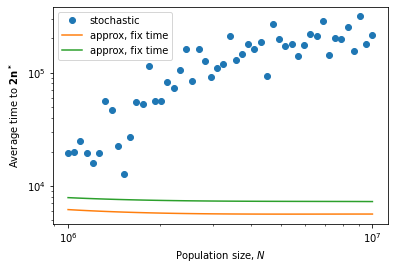

In [55]:
plt.plot(Nm, msim_N2_totmean, 'o', label='stochastic')

plt.plot(Nm, Ta.T_K(Nm,9.6e-08,5.4e-04,1.021,1.025,1.028,True,fc0=.95,fc2=0), '-', label='approx, fix time')
plt.plot(Nm, Ta.T(Nm,9.6e-08,5.4e-04,1.021,1.025,1.028,True,fc0=.95,fc2=0), '-', label='approx, fix time')

plt.xlabel('Population size, $N$')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Average time to $\mathbf{2n^*}$')
#plt.xlim([500,4000])
#plt.ylim([500,40000])
#plt.savefig('figyoavN.pdf')
plt.legend();

C:\Users\aboas\ucloud\PD\aneuploidy\Simulations\Time_approximations.py:114: RuntimeWarning: divide by zero encountered in log
  T_ret=np.log(fixation_cutoff*N/(1-fixation_cutoff)) / np.log(1+s)


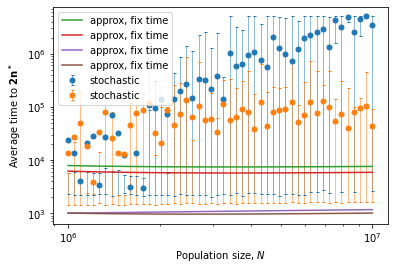

In [70]:
plt.errorbar(Nm, msim_N2_aneu,yerr=errsim_msim_N2_aneu, fmt='o', label='stochastic', elinewidth=.5, capsize=1.5, ms=5)
plt.errorbar(Nm, msim_N2_dirmut,yerr=errsim_msim_N2_dirmut, fmt='o', label='stochastic', elinewidth=.5, capsize=1.5, ms=5)
#plt.plot(Nm, Ta.T_K(Nm,9.6e-08,5.4e-04,1.021,1.025,1.028,True,fc0=.95), '-', label='approx, fix time')
plt.plot(Nm, Ta.T_aneu(Nm, 9.6e-08,5.4e-04,1.021,1.025, 1.028, True,fc3=.95,fc2=0), '-', label='approx, fix time')
plt.plot(Nm, Ta.T_aneu_K(Nm, 9.6e-08,5.4e-04,1.021,1.025, 1.028, True,fc3=.95,fc2=0), '-', label='approx, fix time')

plt.plot(Nm, Ta.T_mut(Nm, 9.6e-08,5.4e-04, 1.021, 1.028, True, fc0=1), '-', label='approx, fix time')
plt.plot(Nm, Ta.T_mut_K(Nm, 9.6e-08, 1.028, True, fc0=1), '-', label='approx, fix time')


plt.xlabel('Population size, $N$')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Average time to $\mathbf{2n^*}$')
#plt.xlim([500,4000])
#plt.ylim([500,4000])
#plt.savefig('figyoavN.pdf')
plt.legend();

In [59]:
dirmutlenN2_f=np.array([len(msim_N_2[1][i]) for i in range(50)])
probdirmutfirstN2_f=dirmutlenN2_f/np.shape(msim_N_2[0][0])
probdirmutfirstN2_f

array([0.435, 0.465, 0.455, 0.49 , 0.505, 0.525, 0.565, 0.545, 0.53 ,
       0.58 , 0.56 , 0.655, 0.6  , 0.64 , 0.63 , 0.705, 0.665, 0.715,
       0.73 , 0.78 , 0.77 , 0.755, 0.74 , 0.8  , 0.775, 0.81 , 0.84 ,
       0.875, 0.9  , 0.885, 0.88 , 0.895, 0.905, 0.905, 0.905, 0.91 ,
       0.905, 0.925, 0.945, 0.955, 0.945, 0.945, 0.965, 0.965, 0.96 ,
       0.955, 0.97 , 0.95 , 0.985, 0.95 ])

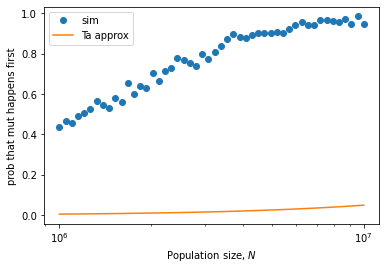

In [61]:
plt.plot(Nm,probdirmutfirstN2_f,'o',label='sim')
plt.plot(Nm,1-Ta.probaneufirst(Nm,9.6e-08,5.4e-04,1.021,1.028),'-',label='Ta approx')

plt.xlabel('Population size, $N$')
plt.xscale('log')
#plt.ylim([0,20000])
plt.ylabel('prob that mut happens first')
#plt.savefig('figyoavδ_noclo.pdf')
plt.legend();

In [62]:
Nm58, msim_N_58=np.load('msim_N_58.npy',allow_pickle=True)
(msim_N_58_aneu, msim_N_58_dirmut), (errsim_msim_N_58_aneu, errsim_msim_N_58_dirmut)=modelext.meanpercerrdiffT(*msim_N_58)

Nm58, msim_N_58_0=np.load('msim_N_58_0.npy',allow_pickle=True)
(msim_N_58_0_aneu, msim_N_58_0_dirmut), (errsim_msim_N_58_0_aneu, errsim_msim_N_58_0_dirmut)=modelext.meanpercerrdiffT(*msim_N_58_0)

C:\Users\aboas\ucloud\PD\aneuploidy\Simulations\Time_approximations.py:114: RuntimeWarning: divide by zero encountered in log
  T_ret=np.log(fixation_cutoff*N/(1-fixation_cutoff)) / np.log(1+s)


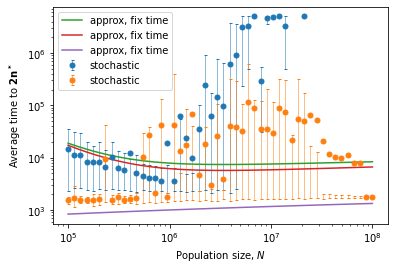

In [69]:
plt.errorbar(Nm58, msim_N_58_aneu,yerr=errsim_msim_N_58_aneu, fmt='o', label='stochastic', elinewidth=.5, capsize=1.5, ms=5)
plt.errorbar(Nm58, msim_N_58_dirmut,yerr=errsim_msim_N_58_dirmut, fmt='o', label='stochastic', elinewidth=.5, capsize=1.5, ms=5)
#plt.plot(Nm, Ta.T_K(Nm,9.6e-08,5.4e-04,1.021,1.025,1.028,True,fc0=.95), '-', label='approx, fix time')
plt.plot(Nm58, Ta.T_aneu(Nm58, 9.6e-08,5.4e-04,1.021,1.025, 1.028, True,fc3=.95,fc2=0), '-', label='approx, fix time')
plt.plot(Nm58, Ta.T_aneu_K(Nm58, 9.6e-08,5.4e-04,1.021,1.025, 1.028, True,fc3=.95,fc2=0), '-', label='approx, fix time')

plt.plot(Nm58, Ta.T_mut(Nm58, 9.6e-08,5.4e-04, 1.021, 1.028, True, fc0=1), '-', label='approx, fix time')
#plt.plot(Nm, Ta.T_mut_K(Nm, 9.6e-08, 1.028, True, fc0=1), '-', label='approx, fix time')


plt.xlabel('Population size, $N$')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Average time to $\mathbf{2n^*}$')
#plt.xlim([500,4000])
#plt.ylim([500,4000])
#plt.savefig('figyoavN.pdf')
plt.legend();

C:\Users\aboas\ucloud\PD\aneuploidy\Simulations\Time_approximations.py:114: RuntimeWarning: divide by zero encountered in log
  T_ret=np.log(fixation_cutoff*N/(1-fixation_cutoff)) / np.log(1+s)


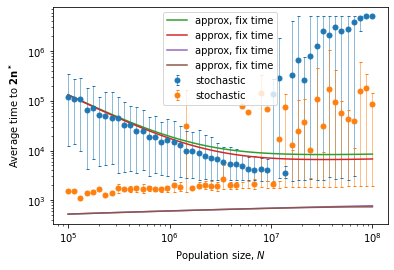

In [78]:
plt.errorbar(Nm58, msim_N_58_0_aneu,yerr=errsim_msim_N_58_0_aneu, fmt='o', label='stochastic', elinewidth=.5, capsize=1.5, ms=5)
plt.errorbar(Nm58, msim_N_58_0_dirmut,yerr=errsim_msim_N_58_0_dirmut, fmt='o', label='stochastic', elinewidth=.5, capsize=1.5, ms=5)
#plt.plot(Nm, Ta.T_K(Nm,9.6e-08,5.4e-04,1.021,1.025,1.028,True,fc0=.95), '-', label='approx, fix time')
plt.plot(Nm58, Ta.T_aneu(Nm58, 1e-08,5.4e-04,1.021,1.025, 1.028, True,fc3=.95,fc2=0), '-', label='approx, fix time')
plt.plot(Nm58, Ta.T_aneu_K(Nm58, 1e-08,5.4e-04,1.021,1.025, 1.028, True,fc3=.95,fc2=0), '-', label='approx, fix time')

plt.plot(Nm58, Ta.T_mut(Nm58, 1e-08, 5.4e-04, 1.021, 1.028, True, fc0=.95), '-', label='approx, fix time')
plt.plot(Nm58, Ta.probaneufirst(Nm58, 1e-8,5.4e-04,1.021, 1.028)*Ta.T_mut(Nm58, 1e-08, 5.4e-04, 1.021, 1.028, True, fc0=.95), '-', label='approx, fix time')


plt.xlabel('Population size, $N$')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Average time to $\mathbf{2n^*}$')
#plt.xlim([500,4000])
#plt.ylim([8e2,4e5])
#plt.savefig('figyoavN.pdf')
plt.legend();

In [79]:
msim_N_58_totmean=np.mean(msim_N_58[0].tolist(),axis=1)
msim_N_58_0_totmean=np.mean(msim_N_58_0[0].tolist(),axis=1)

C:\Users\aboas\ucloud\PD\aneuploidy\Simulations\Time_approximations.py:114: RuntimeWarning: divide by zero encountered in log
  T_ret=np.log(fixation_cutoff*N/(1-fixation_cutoff)) / np.log(1+s)
C:\Users\aboas\ucloud\PD\aneuploidy\Simulations\Time_approximations.py:114: RuntimeWarning: divide by zero encountered in log
  T_ret=np.log(fixation_cutoff*N/(1-fixation_cutoff)) / np.log(1+s)


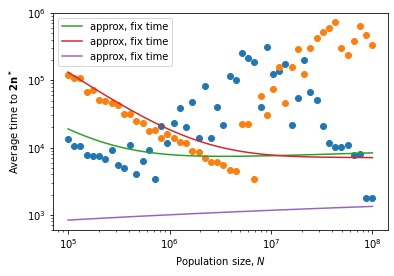

In [82]:
plt.plot(Nm58,msim_N_58_totmean,'o')
plt.plot(Nm58,msim_N_58_0_totmean,'o')

plt.plot(Nm58, Ta.T_aneu(Nm58, 9.6e-08,5.4e-04,1.021,1.025, 1.028, True,fc3=.95,fc2=0), '-', label='approx, fix time')
plt.plot(Nm58, Ta.T(Nm58, 1e-08,5.4e-04,1.021,1.025, 1.028, True,fc1=0,fc3=.95,fc2=0), '-', label='approx, fix time')

plt.plot(Nm58, Ta.T_mut(Nm58, 9.6e-08,5.4e-04,1.021, 1.028, True, fc0=1), '-', label='approx, fix time')
#plt.plot(Nm, Ta.T_mut_K(Nm, 9.6e-08, 1.028, True, fc0=1), '-', label='approx, fix time')


plt.xlabel('Population size, $N$')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Average time to $\mathbf{2n^*}$')
#plt.xlim([500,4000])
#plt.ylim([500,4000])
#plt.savefig('figyoavN.pdf')
plt.legend();

## Testing area

''

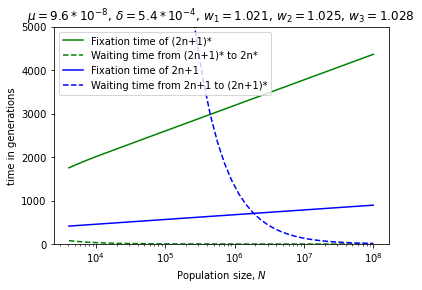

In [59]:
plt.plot(Nvy[6:], Ta.T_kimura(Nvy[6:],Ta.sv(1.021,1.025,1.028)[2],.95),'-',color='green',label='Fixation time of (2n+1)*')
plt.plot(Nvy[6:],Ta.waitgeoapprox(Nvy[6:], 5.4e-04,Ta.sv(1.021,1.025,1.028)[3]),'--',color='green',label='Waiting time from (2n+1)* to 2n*')
plt.plot(Nvy[6:], Ta.T_kimura(Nvy[6:],Ta.sv(1.021,1.025,1.028)[1],.95),'-',color='blue',label='Fixation time of 2n+1')
plt.plot(Nvy[6:],Ta.waitgeoapprox(Nvy[6:],9.6e-08,Ta.sv(1.021,1.025,1.028)[2]),'--',color='blue',label='Waiting time from 2n+1 to (2n+1)*')
  
plt.title('$\mu=9.6*10^{-8},\, \delta=5.4*10^{-4},\, w_1=1.021,\, w_2=1.025,\,w_3=1.028$')
plt.xlabel('Population size, $N$')
plt.xscale('log')
#plt.yscale('log')
plt.ylim([0,5e3])
plt.ylabel('time in generations')
plt.legend()
plt.savefig('waitT_vs_fixT_smallersel.pdf')
;

In [31]:
Nm, ysim_noaneuN=np.load('ysim_noaneuN.npy',allow_pickle=True)
(ysim_noaneuN_aneu, ysim_noaneuN_dirmut), (errsim_ysim_noaneuN_aneu, errsim_ysim_noaneuN_dirmut)=modelext.meanpercerrdiffT(*ysim_noaneuN)

C:\Users\aboas\ucloud\PD\aneuploidy\Simulations\Time_approximations.py:32: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(1-(1-rate*np.minimum(1,2*s))**N)


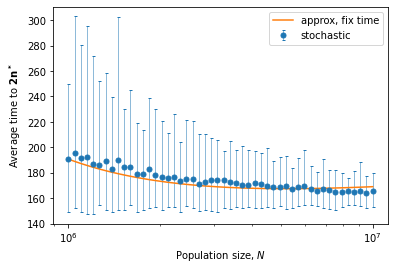

In [33]:
plt.errorbar(Nm, ysim_noaneuN_dirmut,yerr=errsim_ysim_noaneuN_dirmut, fmt='o', label='stochastic', elinewidth=.5, capsize=1.5, ms=5)
plt.plot(Nm, Ta.T_K(Nm,9.6e-8,0,1.09,1.1,1.11,True), '-', label='approx, fix time')
#plt.plot(Nm, Ta.T_mut_K(Nm, 9.6e-8, 1.028, True, fc0=.95), '-', label='approx, fix time')
#plt.plot(Nm, Ta.waitT(Nm, 9.6e-8, Ta.sv(1.021,1.025,1.028)[0]), '-', label='approx wait time')
#plt.plot(Nm, Ta.T_kimura(Nm,  Ta.sv(1.021,1.025,1.028)[0],n0=100), '-', label='approx fix time')


plt.xlabel('Population size, $N$')
plt.xscale('log')
#plt.yscale('log')
plt.ylabel('Average time to $\mathbf{2n^*}$')
#plt.xlim([3e3,1e8])
#plt.ylim([0,100])
#plt.savefig('figyoavN.pdf')
plt.legend();

In [ ]:
v

In [7]:
def minwaitT(N ,μ ,δ ,w1 , w3):
    return 1/(1-((1-2*μ*(w3-1))*(1-2*δ*(w1-1)))**N)

def waitT_n(N,rate,s):
    return 1/(1-(1-2*s*rate)**N)

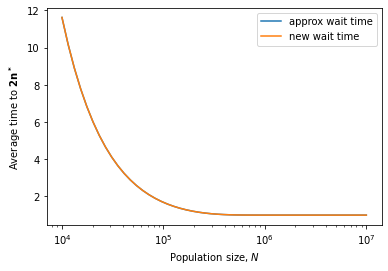

In [13]:
#plt.errorbar(Nm, ysim_noaneuN_dirmut,yerr=errsim_ysim_noaneuN_dirmut, fmt='o', label='stochastic', elinewidth=.5, capsize=1.5, ms=5)
#plt.plot(Nm, Ta.T_K(Nm,9.6e-8,0,1.09,1.1,1.11,True), '-', label='approx, fix time')
#plt.plot(Nm, Ta.T_mut_K(Nm, 9.6e-8, 1.028, True, fc0=.95), '-', label='approx, fix time')
#plt.plot(Nml, Ta.waitT(Nml, 5e-5, Ta.sv(1.09,1.1,1.11)[1]), '-', label='approx wait time')
plt.plot(Nml, Ta.min_waitT(Nml, 5e-9,5e-5,1.09,1.11), '-', label='approx wait time')
#plt.plot(Nm, (1-Ta.probaneufirst(Nm,9.6e-8,5.4e-4,1.021,1.028))*minwaitT(Nm,9.6e-8,5.4e-4,1.021,1.028),'-',label='new wait time')
plt.plot(Nml, minwaitT(Nml,5e-9,5e-5,1.09,1.11),'-',label='new wait time')
#plt.plot(Nm, Ta.T_kimura(Nm,  Ta.sv(1.021,1.025,1.028)[0],n0=100), '-', label='approx fix time')


plt.xlabel('Population size, $N$')
plt.xscale('log')
#plt.yscale('log')
plt.ylabel('Average time to $\mathbf{2n^*}$')
#plt.xlim([3e3,1e8])
#plt.ylim([0,10000])
#plt.savefig('figyoavN.pdf')
plt.legend();

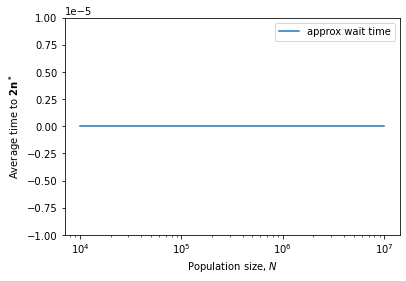

In [29]:
plt.plot(Nml, (Ta.min_waitT(Nml, 5e-9,5e-5,1.09,1.11)-minwaitT(Nml,5e-9,5e-5,1.09,1.11))/minwaitT(Nml,5e-9,5e-5,1.09,1.11), '-', label='approx wait time')
#plt.plot(Nm, (1-Ta.probaneufirst(Nm,9.6e-8,5.4e-4,1.021,1.028))*minwaitT(Nm,9.6e-8,5.4e-4,1.021,1.028),'-',label='new wait time')
#plt.plot(Nml, minwaitT(Nml,5e-9,5e-5,1.09,1.11),'-',label='new wait time')
#plt.plot(Nm, Ta.T_kimura(Nm,  Ta.sv(1.021,1.025,1.028)[0],n0=100), '-', label='approx fix time')


plt.xlabel('Population size, $N$')
plt.xscale('log')
#plt.yscale('log')
plt.ylabel('Average time to $\mathbf{2n^*}$')
#plt.xlim([3e3,1e8])
plt.ylim([-1e-5,1e-5])
#plt.savefig('figyoavN.pdf')
plt.legend();

In [16]:
modelext = SingleLocusModelExt(k=1)
mfitness=[1.021, 1.025, 1.028]

In [17]:
msim_N_58_teste7=modelext.run_simulations_time(1e7, 9.6e-8, 5.4e-04, 5.4e-04,
 *mfitness, repetitions=100, max_gen=5*10**6,seed=1)

In [18]:
msim_N_58_teste7

(array([1.690000e+03, 8.274490e+05, 1.691000e+03, 2.117000e+03,
        1.888000e+03, 1.773000e+03, 1.851000e+03, 5.366800e+05,
        1.753000e+03, 1.811000e+03, 2.775580e+05, 1.862000e+03,
        1.728000e+03, 1.687000e+03, 1.873000e+03, 1.672000e+03,
        1.926000e+03, 1.794000e+03, 1.711000e+03, 1.645000e+03,
        1.941000e+03, 1.729000e+03, 1.746000e+03, 2.334000e+03,
        1.851000e+03, 1.909000e+03, 1.895000e+03, 4.999999e+06,
        1.812000e+03, 5.246200e+04, 6.673700e+04, 2.383000e+03,
        1.657000e+03, 1.685000e+03, 1.756000e+03, 2.196000e+03,
        1.668000e+03, 1.713000e+03, 1.689000e+03, 1.810000e+03,
        1.879950e+05, 1.586000e+03, 2.079000e+03, 1.742000e+03,
        1.875000e+03, 1.671000e+03, 1.860000e+03, 2.061000e+03,
        1.747000e+03, 4.045173e+06, 1.747000e+03, 2.984600e+04,
        1.695000e+03, 1.908000e+03, 1.645000e+03, 5.055500e+04,
        1.976000e+03, 1.694000e+03, 1.629000e+03, 6.177570e+05,
        1.891000e+03, 1.635000e+03, 1.82

In [25]:
len(msim_N_58_teste7[1])

97

In [21]:
msim_N_58_teste7[0][27]

4999999.0

In [13]:
 msim_N_58

array([[array([22011.,  4628., 23294.,  5039.,  6932., 24772., 10660.,  3957.,
       53123., 11011., 18305., 29568., 26733., 13990.,  1327., 20448.,
       24162.,  8081., 22927.,  3131., 22229.,  7267.,  1589.,  2217.,
        6883., 33615.,  2421., 11510., 22738.,  1633., 14071.,  1761.,
       12952.,  8359.,  5726., 10810., 15421.,  1486., 17862., 17114.,
        2918.,  4237.,  4199.,  6493., 21328., 14412.,  1856.,  2175.,
       17505.,  5520., 30828.,  3385., 27494.,  1675.,  3109.,  4177.,
        6374.,  2703.,  5605., 23039.,  7377., 52763.,  4922.,  4809.,
       37864., 18817.,  8294., 35836., 17884., 35825.,  7340., 21322.,
       25352.,  1336.,  4666., 13147., 35053., 18475., 11777.,  4129.,
       16776., 23707., 19652., 14175., 25244.,  2998., 23191.,  1548.,
       16261., 11308.,  7773.,  3317.,  7071.,  2096., 12641.,  3191.,
       23213.,  9211.,  5116., 19755.]),
        array([ 2491.,  1432.,  7994.,  9839.,  3878.,  2727.,  7868.,  3482.,
       16931.,  6554